<h1> Southern Water Corp Python Statistics Case Study</h1>

In this Case Study, we're going to work with Pump Data from Southern Water Corp and using Python's plotting and modelling libraries our goal is to create an alarm model which, using statistically significant variables, should predict Pump Failure. 


<img src = 'https://www.sdcwa.org/wp-content/uploads/2020/10/Seawater-Desalination.jpg'>

---

# Part I: <span style="color:green">Descriptive Statistics</span>

I will need the following libraries for my analysis: 

**Matplotlib** - This is Python's basic plotting library. 

**Seaborn** - This library will enable you to create aesthetically pleasing plots.

**Pandas** - This library will enable you to view and manipulate your data in a tabular format.

**statsmodels.api** - This library will enable you to create statistical models, specifically performing regession analysis


In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

 
The data received from Southern Water Corp has been split into two files.
The first file, titled DF_Raw_Data contains all the 'raw' Pump Data needed for the initial analysis.
The second file, titled DF_Rolling_Stdev contains the Rolling Standard Deviation Data needed later more in depth analysis.

In [45]:
#import csv files as dataframes
dataframe_raw = pd.read_csv('DF_Raw_Data.csv')
dataframe_stdev = pd.read_csv('DF_Rolling_Stdev.csv')

In [46]:
#gathering general information about the data
print(dataframe_raw.describe(), dataframe_raw.info())
print('*********************************************************')
print('*********************************************************')
print('*********************************************************')
print(dataframe_stdev.describe(), dataframe_stdev.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data Source              2453 non-null   object 
 1   TIMEFRAME (DD/MM/YYYY)   2453 non-null   object 
 2   Volumetric Flow Meter 1  2453 non-null   float64
 3   Volumetric Flow Meter 2  2453 non-null   float64
 4   Pump Speed (RPM)         2453 non-null   int64  
 5   Pump Torque              2453 non-null   int64  
 6   Ambient Temperature      2453 non-null   int64  
 7   Horse Power              2453 non-null   float64
 8   Pump Efficiency          2453 non-null   float64
 9   PUMP FAILURE (1 or 0)    2453 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 191.8+ KB
       Volumetric Flow Meter 1  Volumetric Flow Meter 2  Pump Speed (RPM)  \
count              2453.000000              2453.000000       2453.000000   
mean                 41.802

In the raw dataset, the means and standard deviations are quite far apart, indicating the data is quite skewed. After transforming the data into rolling standard deviations, the stdev datasets means and standard deviations are far closer together, indicating the stdev dataset may be more easy to use for correlation.

#### Creating Boxplots and Line Plots of both the Raw and StDev Data to better visualize the information.

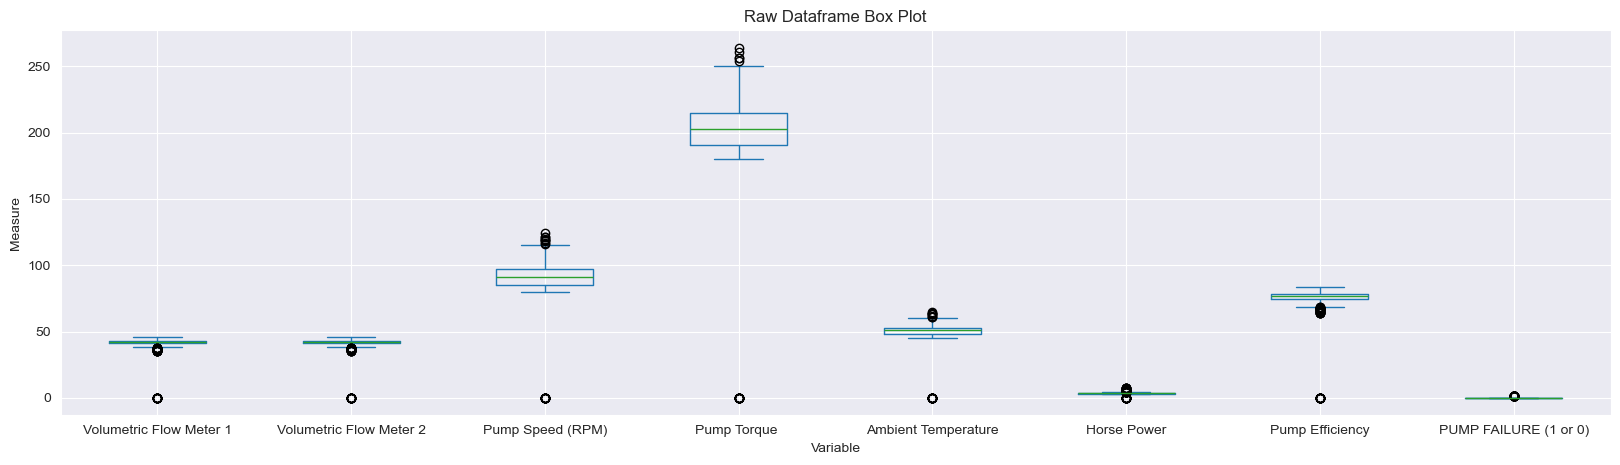

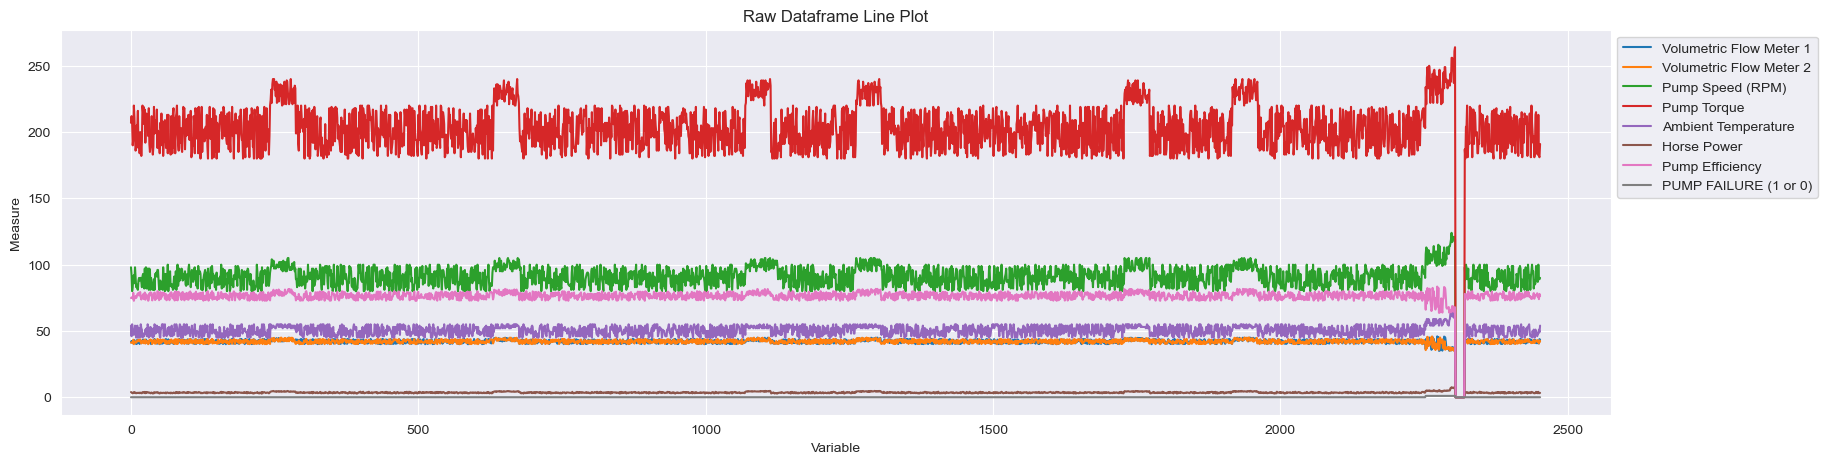

In [49]:
dataframe_raw.plot(kind='box')
plt.xlabel('Variable')
plt.ylabel('Measure')
plt.title('Raw Dataframe Box Plot')
plt.show()

dataframe_raw.plot(kind='line')
plt.xlabel('Variable')
plt.ylabel('Measure')
plt.title('Raw Dataframe Line Plot')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

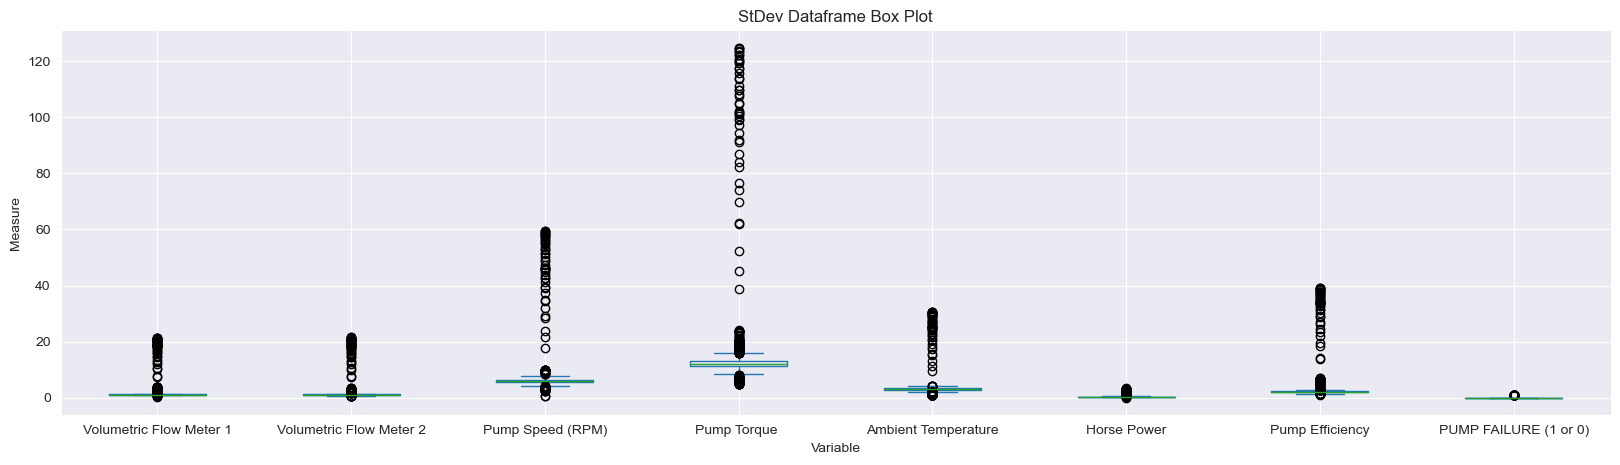

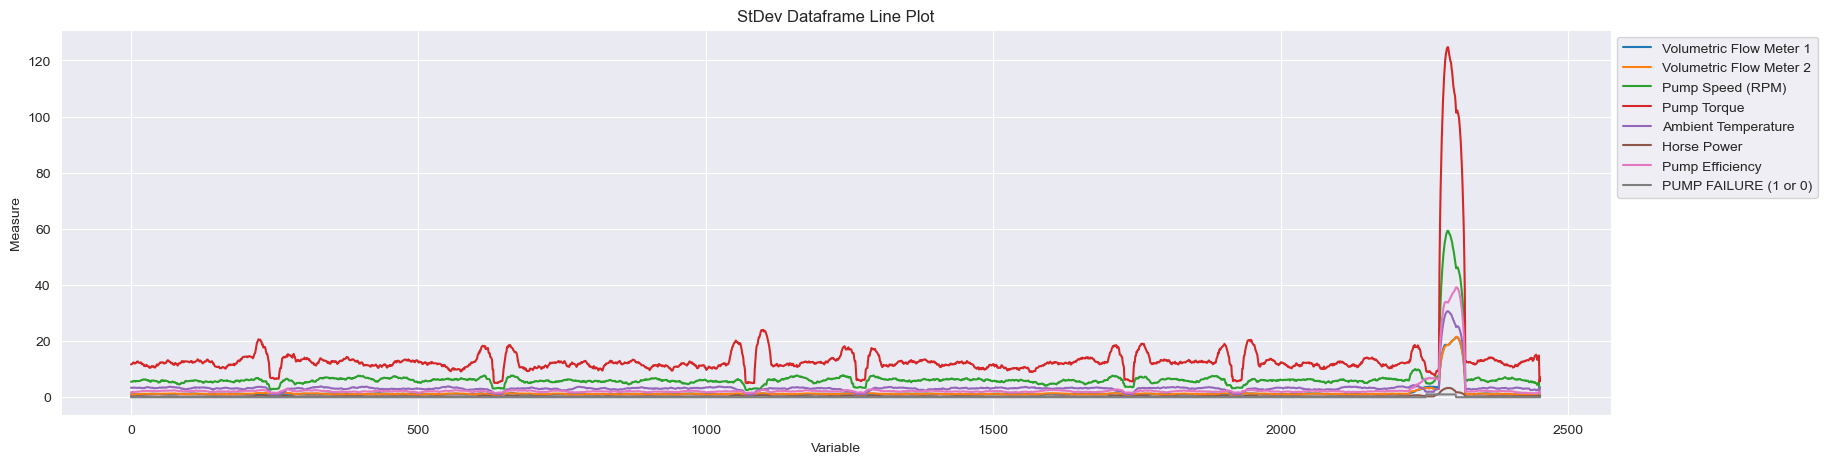

In [50]:
dataframe_stdev.plot(kind='box')
plt.xlabel('Variable')
plt.ylabel('Measure')
plt.title('StDev Dataframe Box Plot')
plt.show()

dataframe_stdev.plot(kind='line')
plt.xlabel('Variable')
plt.ylabel('Measure')
plt.title('StDev Dataframe Line Plot')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

The StDev box plots show a marked increase in outliers compared to the raw data. The StDev line plots appear to show the same basic behavior as the raw data plots, but it is more obvious when there is a spike/dip in the data. This may further indicate that the StDev data is the more correlated set.

### Creating filter for Pump Failure
For both the raw and stdev dataset, I will create boxplot for both Pump Failure (i.e. Pump Failure = 1)  and normal operation (Pump Failure = 0)


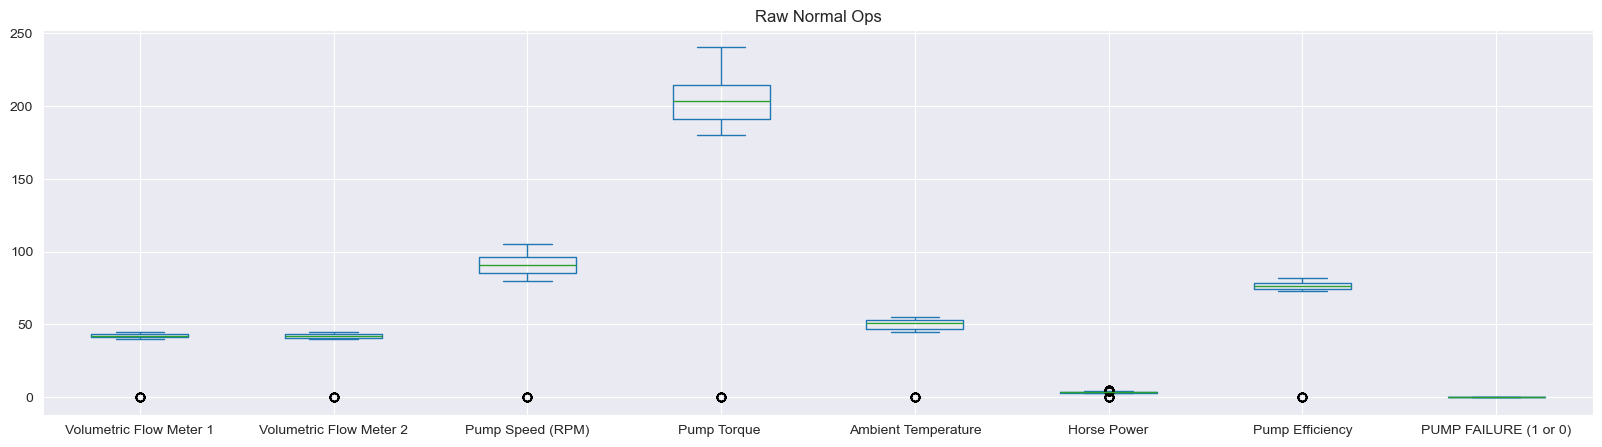

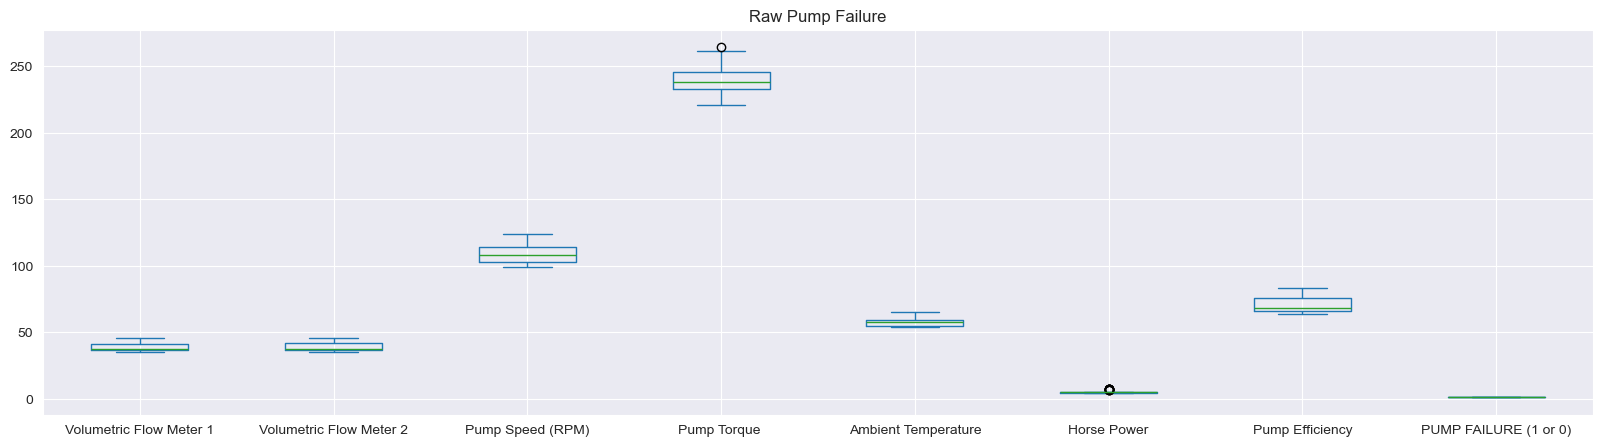

In [53]:
normal_ops = dataframe_raw['PUMP FAILURE (1 or 0)'] == 0
pump_failure = dataframe_raw['PUMP FAILURE (1 or 0)'] == 1

raw_normal = dataframe_raw[normal_ops]
raw_normal.plot(kind='box')
plt.title('Raw Normal Ops')
plt.show()

raw_failure = dataframe_raw[pump_failure]
raw_failure.plot(kind='box')
plt.title('Raw Pump Failure')
plt.show()

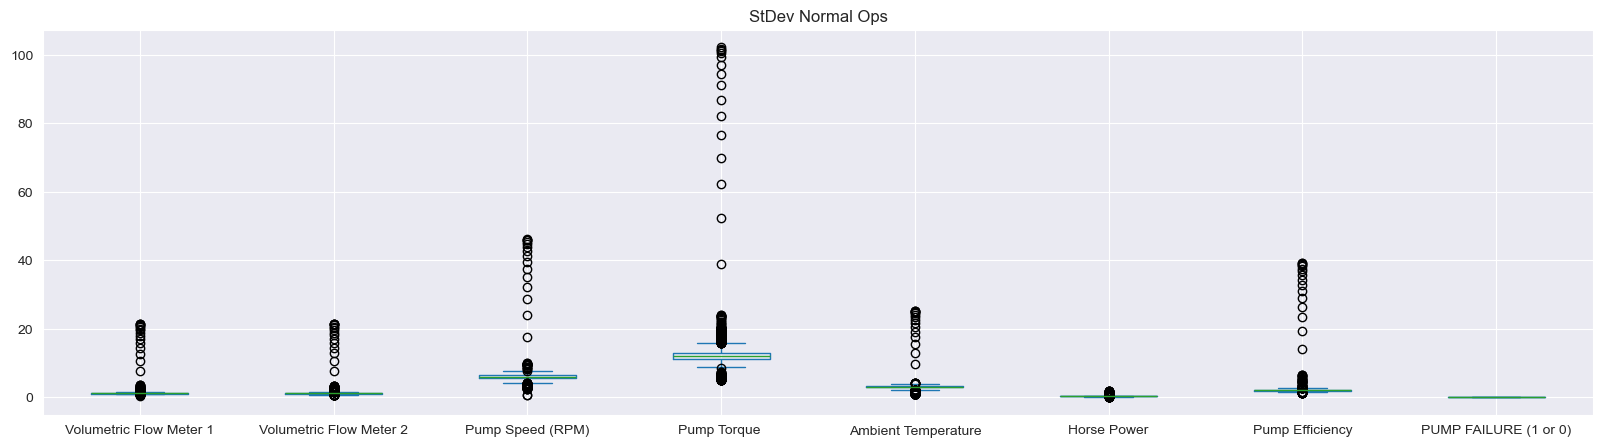

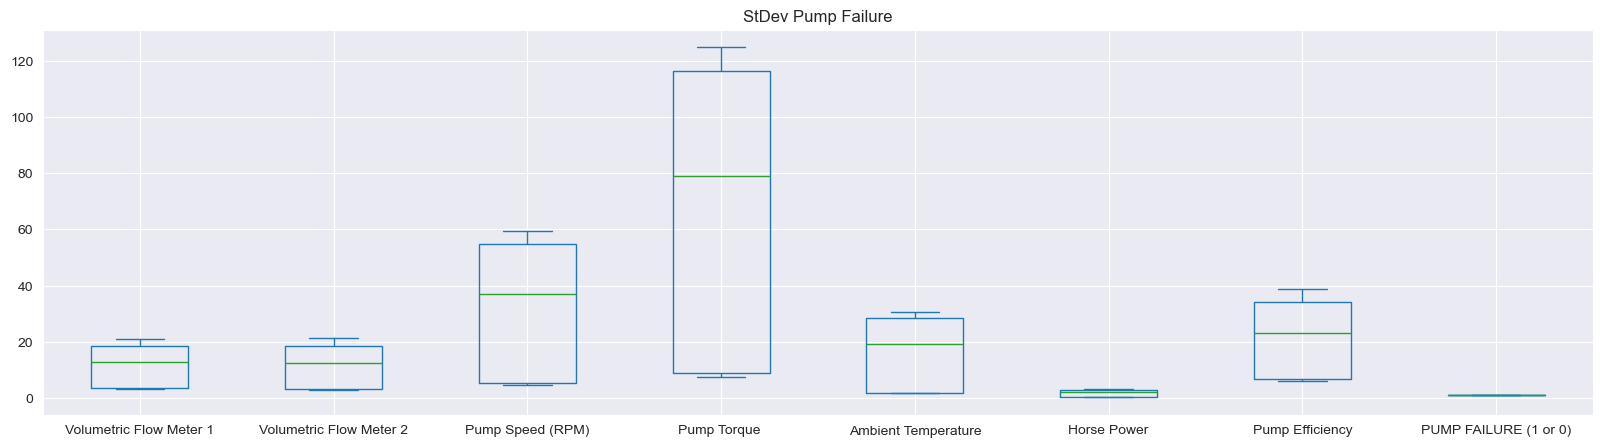

In [54]:
normal_ops = dataframe_stdev['PUMP FAILURE (1 or 0)'] == 0
pump_failure = dataframe_stdev['PUMP FAILURE (1 or 0)'] == 1

stdev_normal = dataframe_stdev[normal_ops]
stdev_normal.plot(kind='box')
plt.title('StDev Normal Ops')
plt.show()

stdev_failure = dataframe_stdev[pump_failure]
stdev_failure.plot(kind='box')
plt.title('StDev Pump Failure')
plt.show()

The StDev data much more easily shows a difference between the normal ops state and the failure state. Between those two graphs you clearly see the huge changes in IQR and outliers. From the second graph it appears that Pump Torque, Pump Speed, and Pump Efficiency/Ambient Temperature are the metrics most variable during pump failure.

### Create Quartiles and IQR

In [57]:
Q1 = dataframe_raw.quantile(0.25, numeric_only=True)
Q3 = dataframe_raw.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
print('Q1:')
print(Q1)
print('Q3:')
print(Q3)
print('IQR:')
print(IQR)



Q1:
Volumetric Flow Meter 1     41.05
Volumetric Flow Meter 2     41.00
Pump Speed (RPM)            85.00
Pump Torque                191.00
Ambient Temperature         48.00
Horse Power                  3.22
Pump Efficiency             74.56
PUMP FAILURE (1 or 0)        0.00
Name: 0.25, dtype: float64
Q3:
Volumetric Flow Meter 1     43.14
Volumetric Flow Meter 2     43.13
Pump Speed (RPM)            97.00
Pump Torque                215.00
Ambient Temperature         53.00
Horse Power                  3.78
Pump Efficiency             78.47
PUMP FAILURE (1 or 0)        0.00
Name: 0.75, dtype: float64
IQR:
Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64


### Identify Outliers
<b> Outlier = Q1 - 1.5x IQR OR Q3 + 1.5x IQR </b>

After defining quartiles and IQR, next step is to identify outliers as defined by the formula above. We then want to know what is the percentage of data that remains after we've removed the Outliers from the raw dataset?
    

In [59]:
lower_limit = Q1 - (IQR * 1.5)
upper_limit = Q3 + (IQR * 1.5)
outliers = dataframe_raw[((dataframe_raw[IQR.index] < lower_limit) | ((dataframe_raw[IQR.index] > upper_limit))).any(axis=1)]
print(outliers.shape)

(95, 10)


In [60]:
raw_row_ct = len(dataframe_raw)
outliers_row_ct = len(outliers)
remaining_row_ct = raw_row_ct - outliers_row_ct
pct_remain = round(((remaining_row_ct / raw_row_ct) * 100), 1)
print('After removing outliers,', pct_remain, '% of the raw data remains')

After removing outliers, 96.1 % of the raw data remains


Considering over 96% of the original raw data remains after removing outliers, this suggests that the outliers were a very small proportion of the actual dataset. However considering the situation, these outliers are actual readings from sensors so it makes more sense to keep the outliers as they are valid data points, possibly the only data points during a failure.

### Create Boxplot without Outliers 

In order to better visualize the data without outliers we will remove them and replot the raw data.


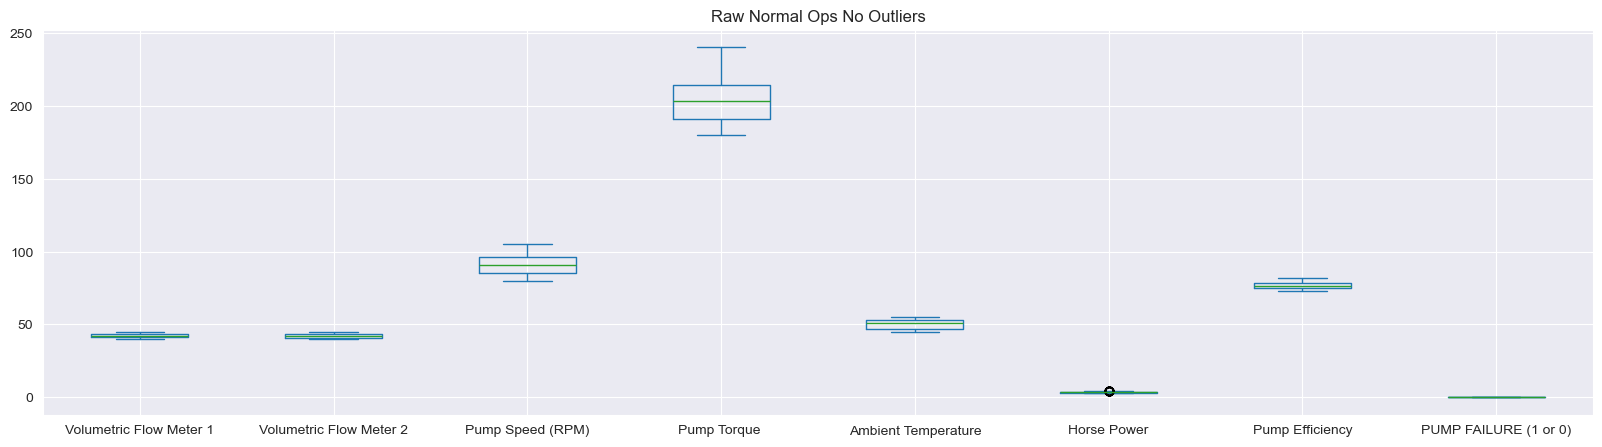

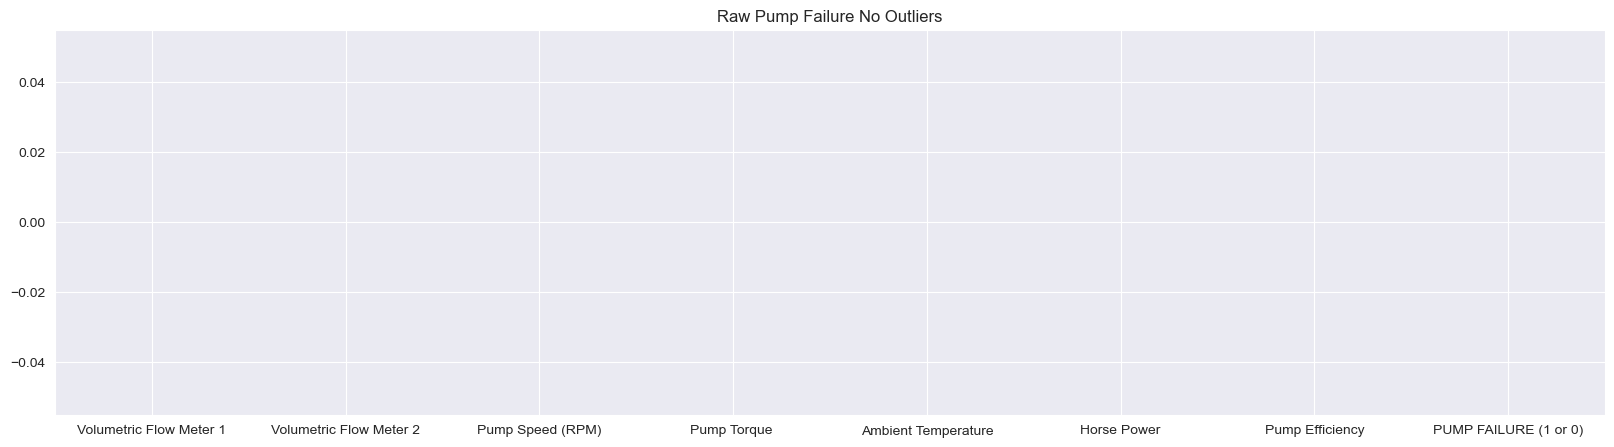

Raw pump failure row count: 0


In [63]:
no_outliers = dataframe_raw[~dataframe_raw.isin(outliers)]
normal_ops_no = no_outliers['PUMP FAILURE (1 or 0)'] == 0
pump_failure_no = no_outliers['PUMP FAILURE (1 or 0)'] == 1

raw_normal_no = no_outliers[normal_ops_no]
raw_normal_no.plot(kind='box')
plt.title('Raw Normal Ops No Outliers')
plt.show()

raw_failure_no = no_outliers[pump_failure_no]
raw_failure_no.plot(kind='box')
plt.title('Raw Pump Failure No Outliers')
plt.show()
print('Raw pump failure row count:', len(raw_failure_no))

Here we confirm the validity of the outliers as plot of data during a Pump Failure with no Outliers contains no data. This means we must keep the outliers in the dataset.

### Plot and Examine Each Variable

Iterate through the raw dataframe and plot each individual variable out and compare this with the Pump Failure fin order to better separate individual variable influence.

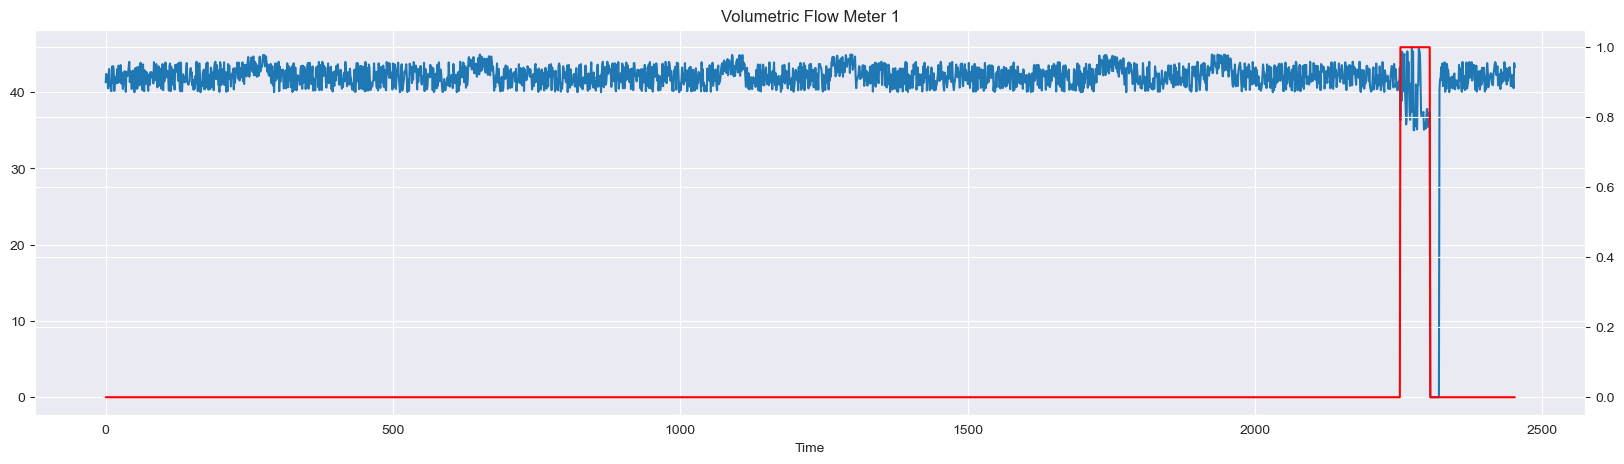

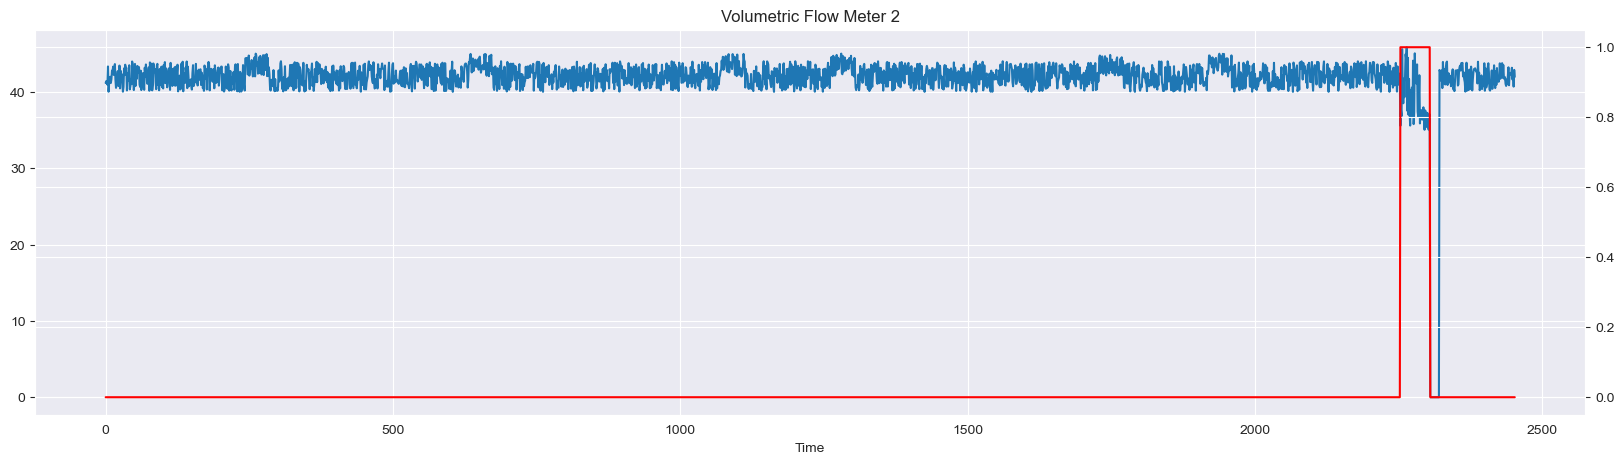

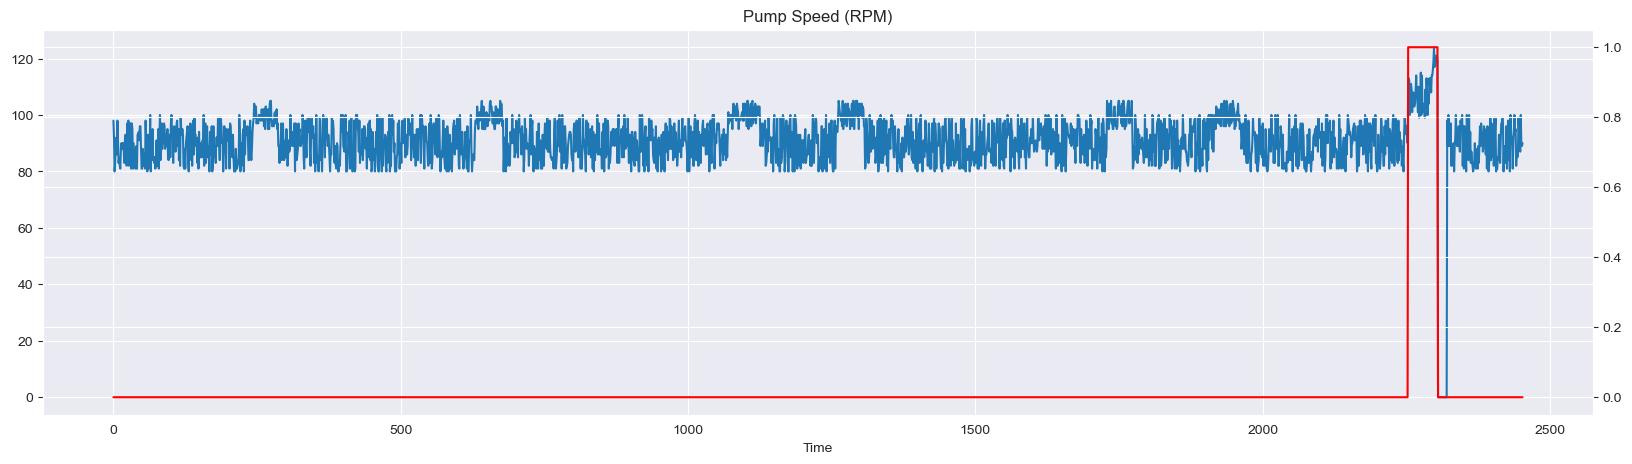

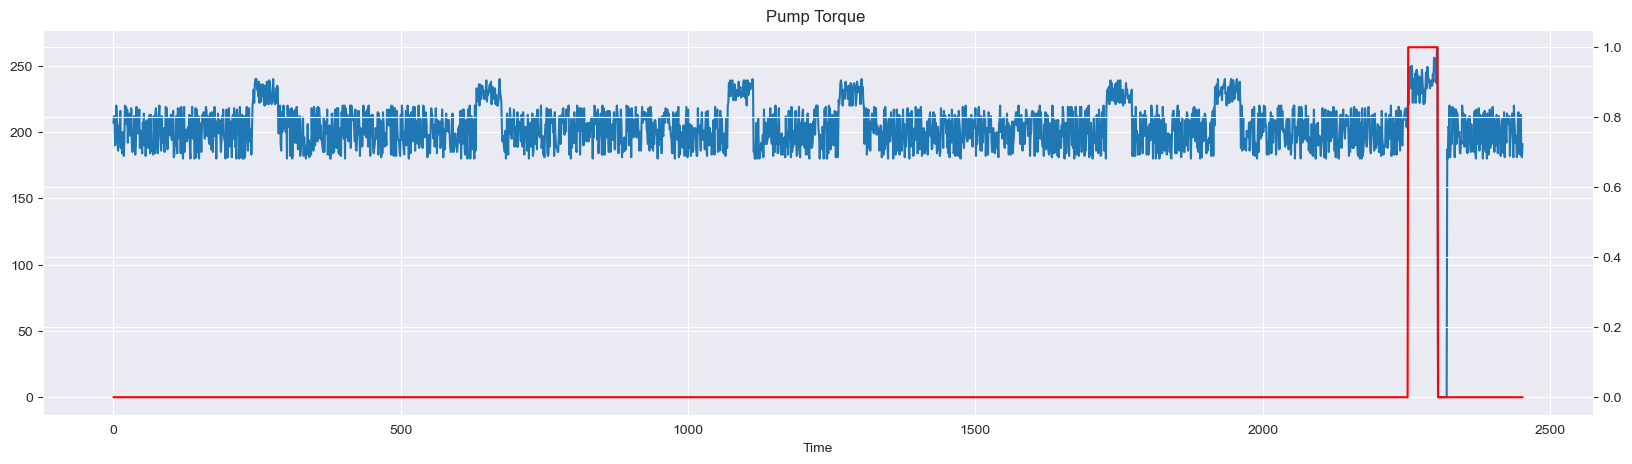

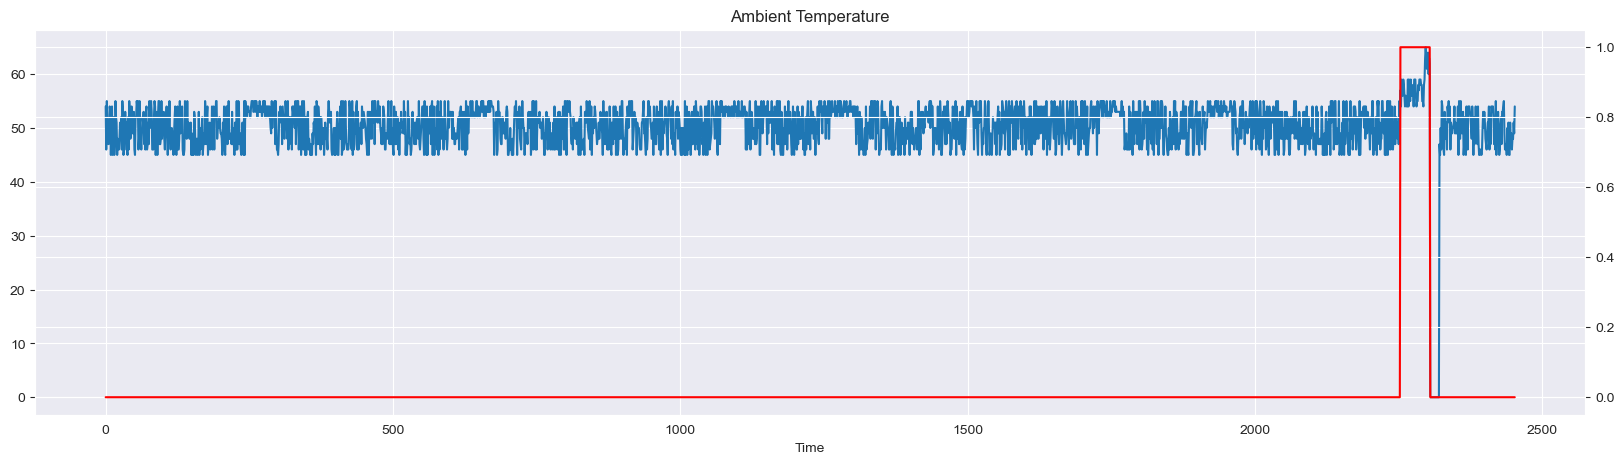

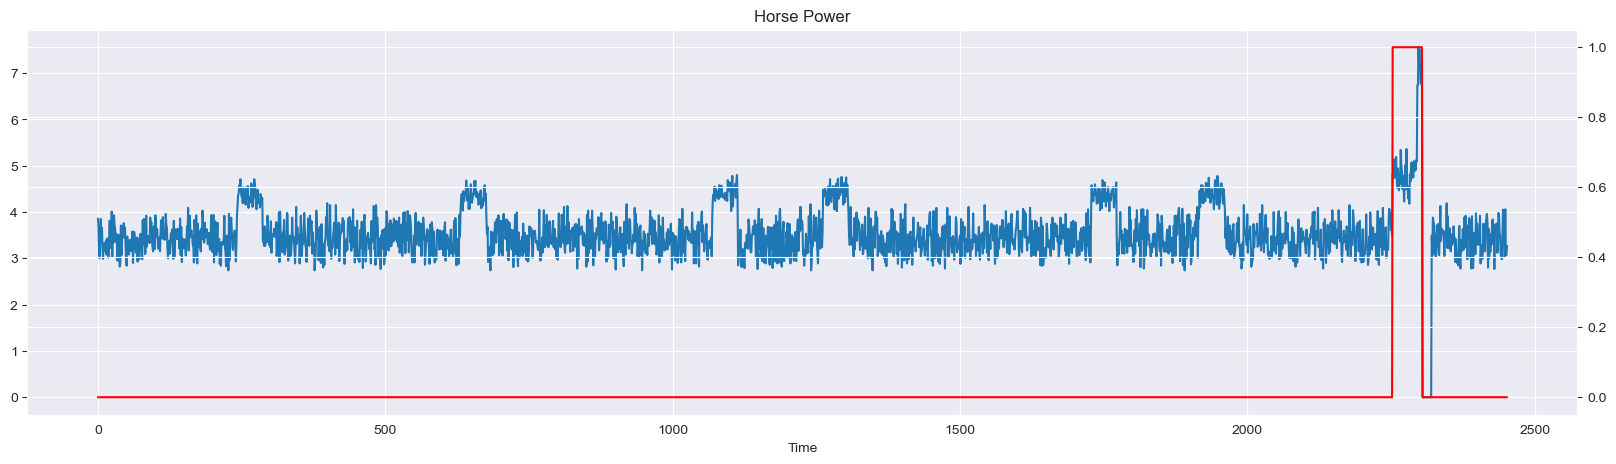

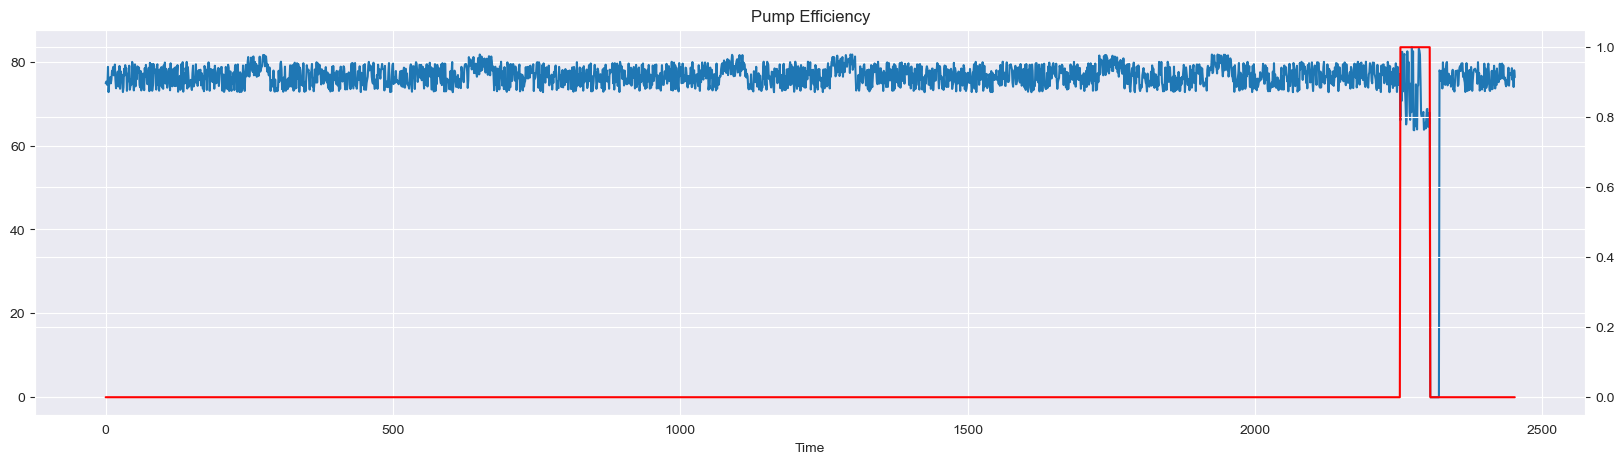

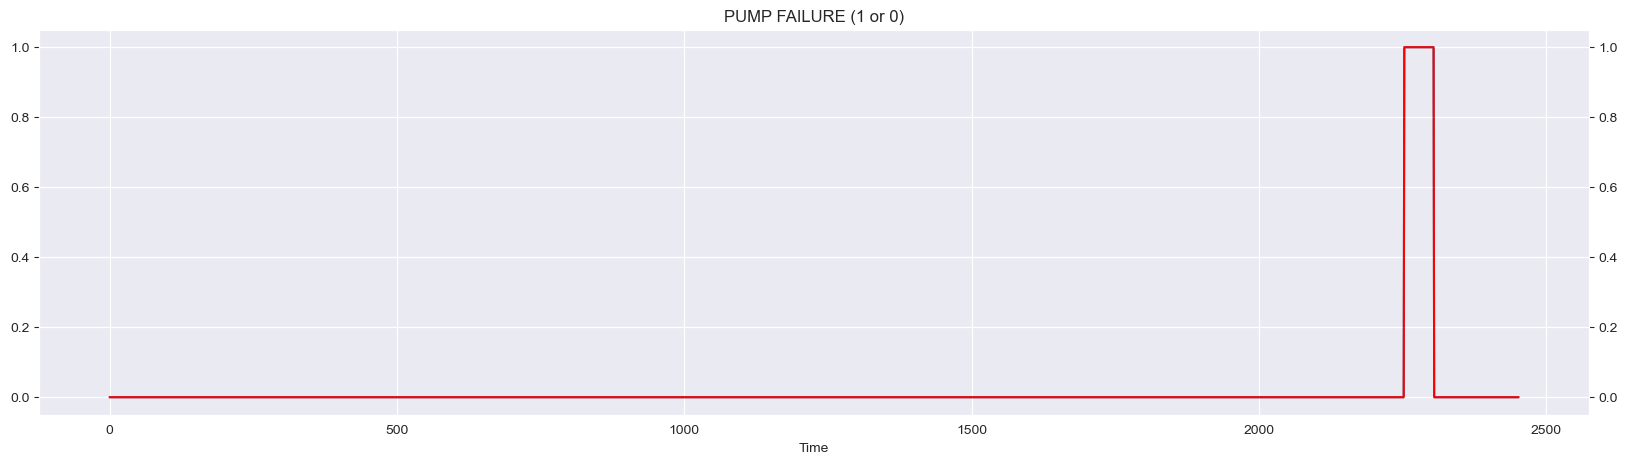

In [67]:
ListOfVariables = ['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Pump Torque ', 'Ambient Temperature', 'Horse Power', 'Pump Efficiency', 'PUMP FAILURE (1 or 0)']
for item in ListOfVariables:
    fig, ax = plt.subplots()
    ax.plot(dataframe_raw[item])
    ax.set_xlabel('Time')
    ax2 = ax.twinx()
    ax2.plot(dataframe_raw['PUMP FAILURE (1 or 0)'], color='red')
    plt.title(item)
    plt.show()


It looks like pretty much every variable has a change relative to the failure state. Some variables (like HP, Torque, Speed) show a more obvious spike than others. However the raw dataset is not very clear in this.

### Create a Plot for Pump Failures Over a Rolling Time Period 

In order to plot over time, we need to set the index of the dataframe to use the TIMEFRAME column. I will then re-plot all the numerical variables in the stdev dataset for the following time periods:
     10/12/2014 12:00 to 10/12/2014 14:30

In [70]:
dataframe_stdev.set_index('TIMEFRAME (DD/MM/YYYY)', inplace=True)
print(dataframe_stdev.head())

                                      Data Source  Volumetric Flow Meter 1  \
TIMEFRAME (DD/MM/YYYY)                                                       
9/12/2014 0:00          Rolling Stdev (30 Minute)                     1.04   
9/12/2014 0:01          Rolling Stdev (30 Minute)                     1.06   
9/12/2014 0:02          Rolling Stdev (30 Minute)                     1.06   
9/12/2014 0:03          Rolling Stdev (30 Minute)                     1.06   
9/12/2014 0:04          Rolling Stdev (30 Minute)                     1.07   

                        Volumetric Flow Meter 2  Pump Speed (RPM)  \
TIMEFRAME (DD/MM/YYYY)                                              
9/12/2014 0:00                             0.96              5.54   
9/12/2014 0:01                             1.01              5.49   
9/12/2014 0:02                             1.03              5.62   
9/12/2014 0:03                             1.05              5.61   
9/12/2014 0:04                         

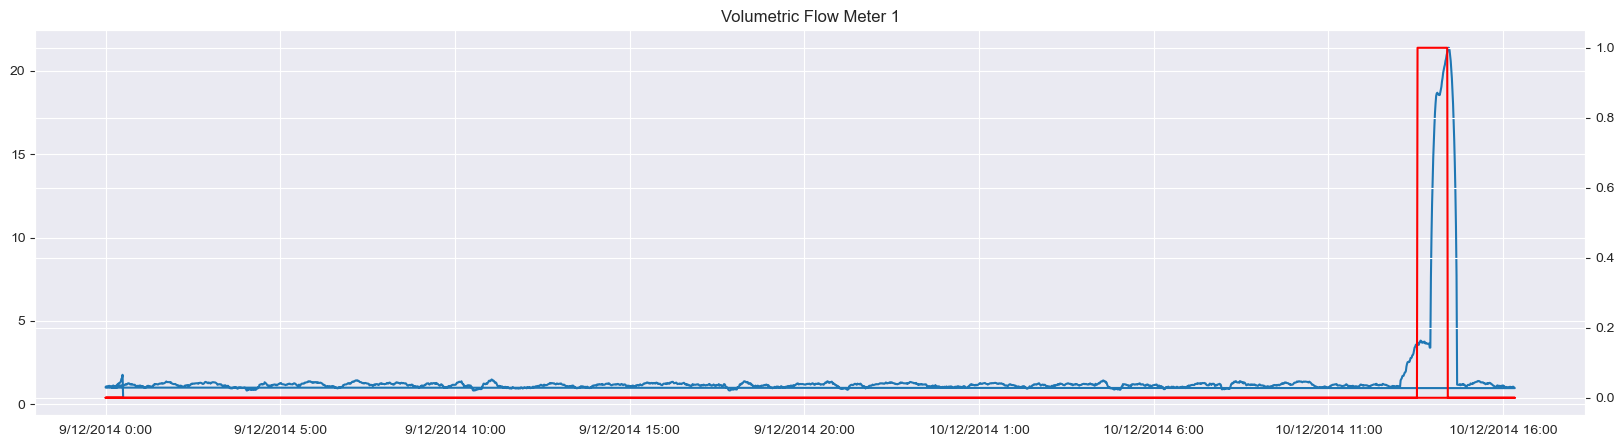

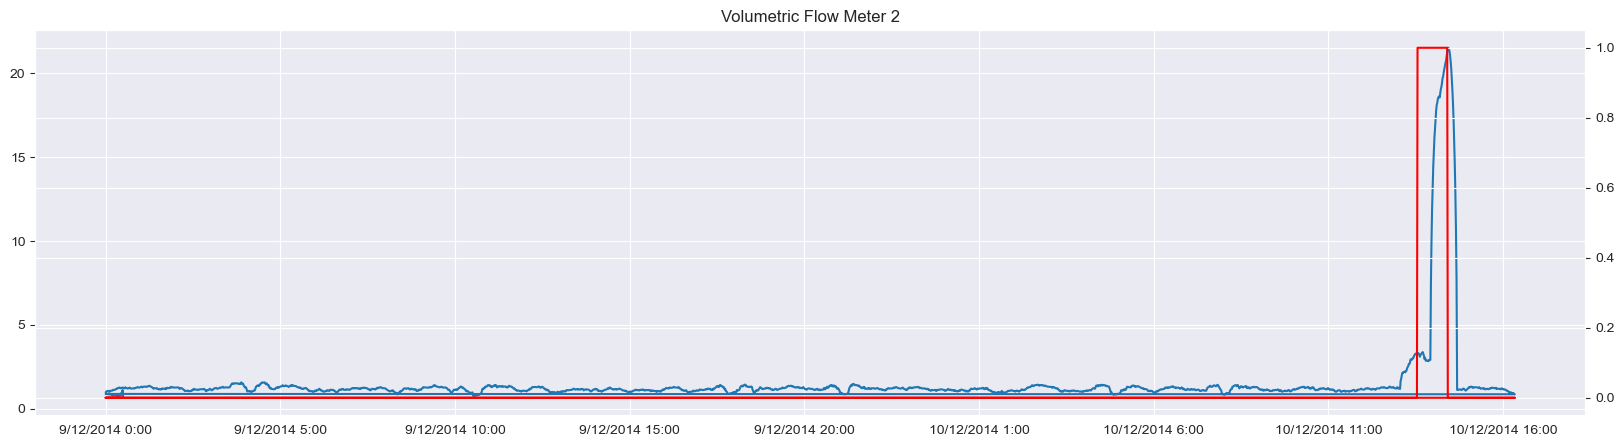

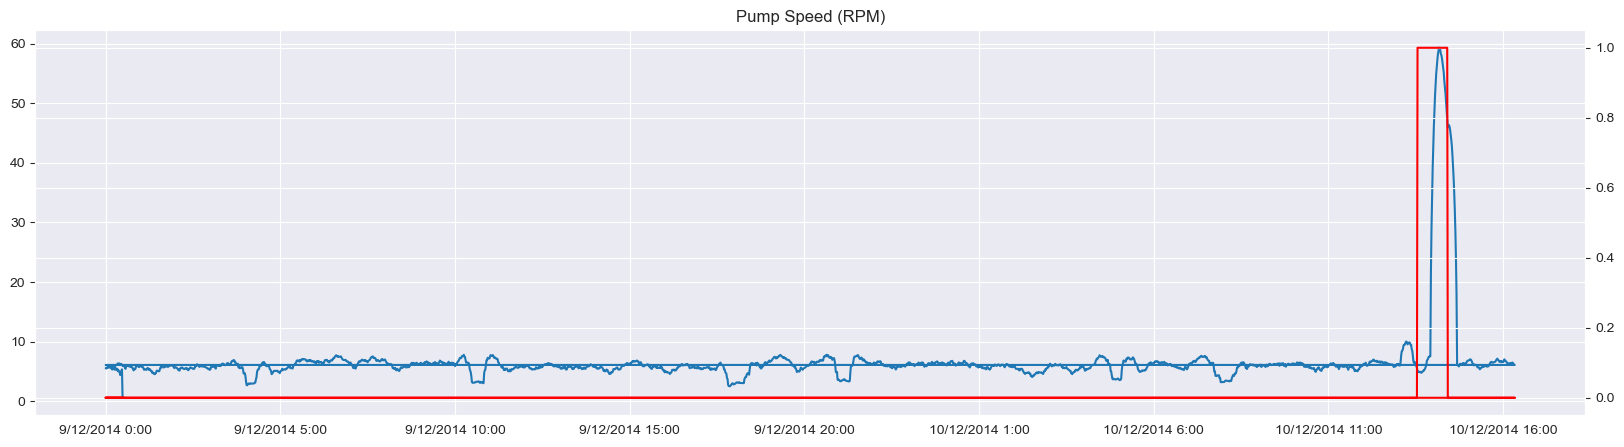

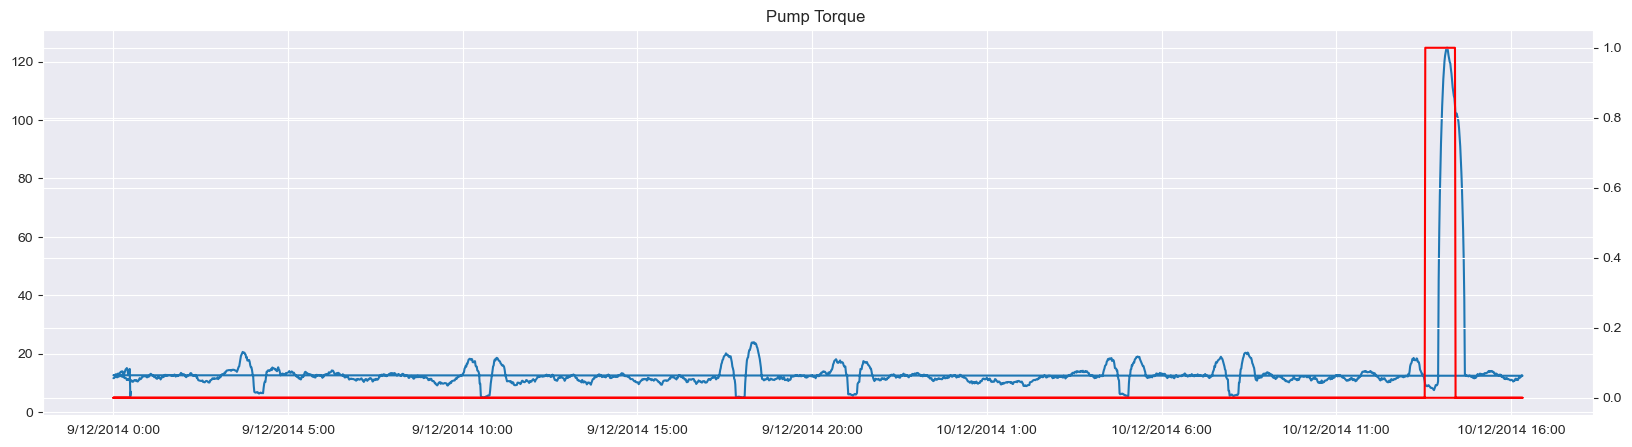

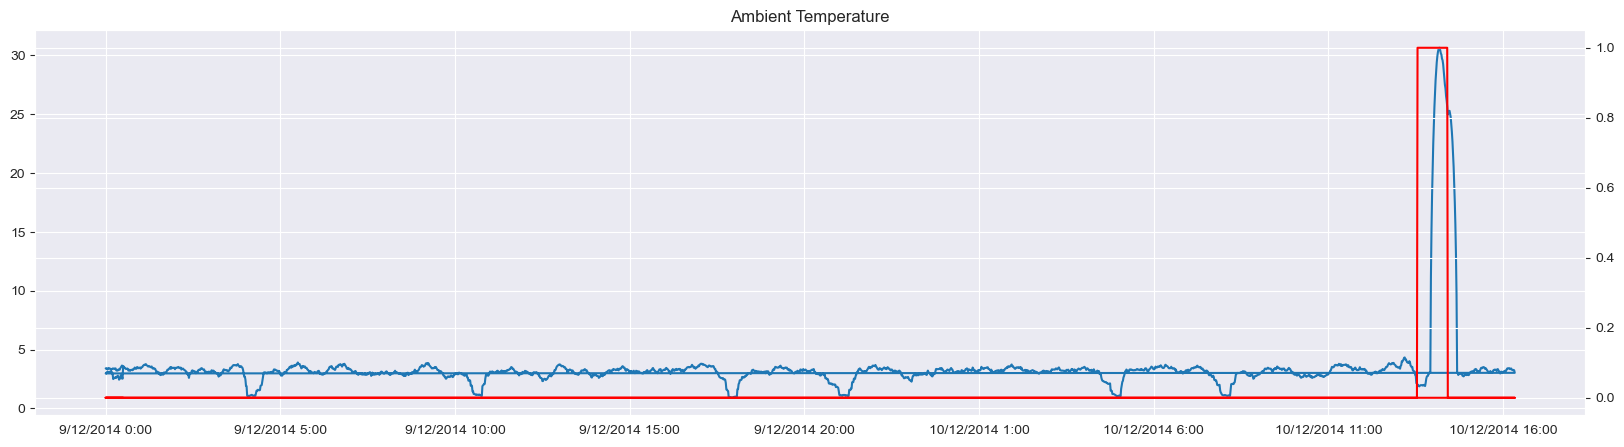

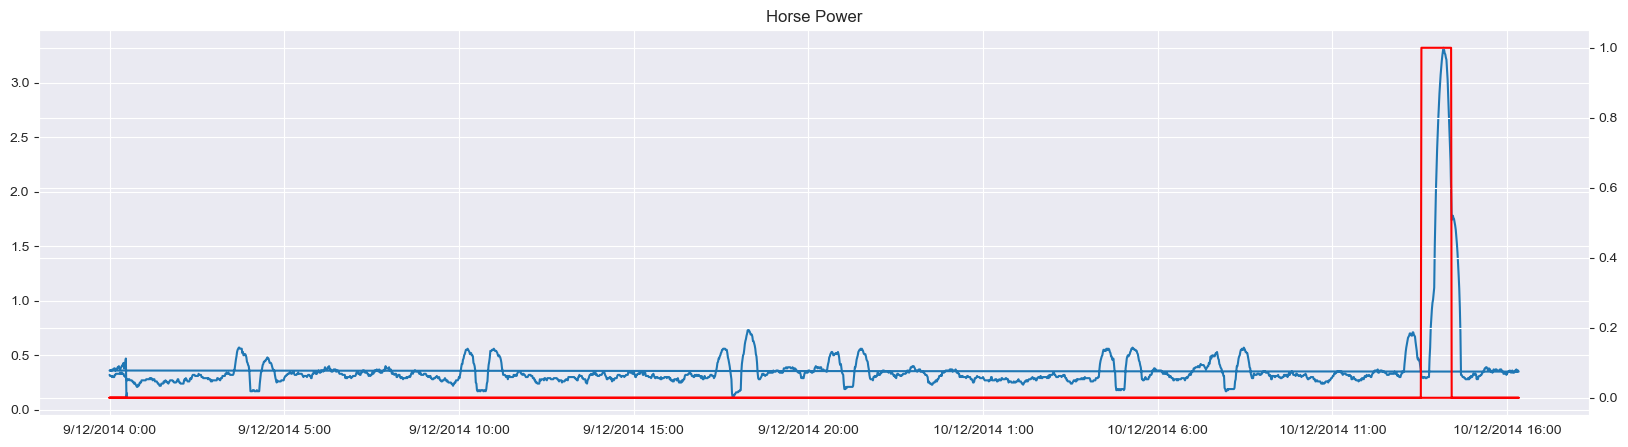

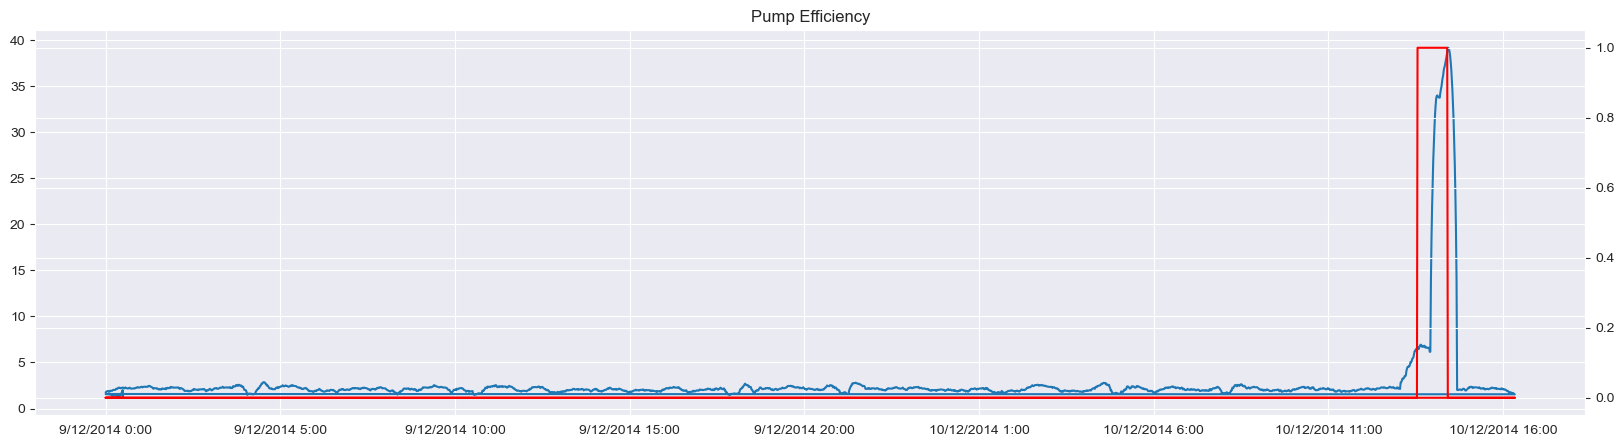

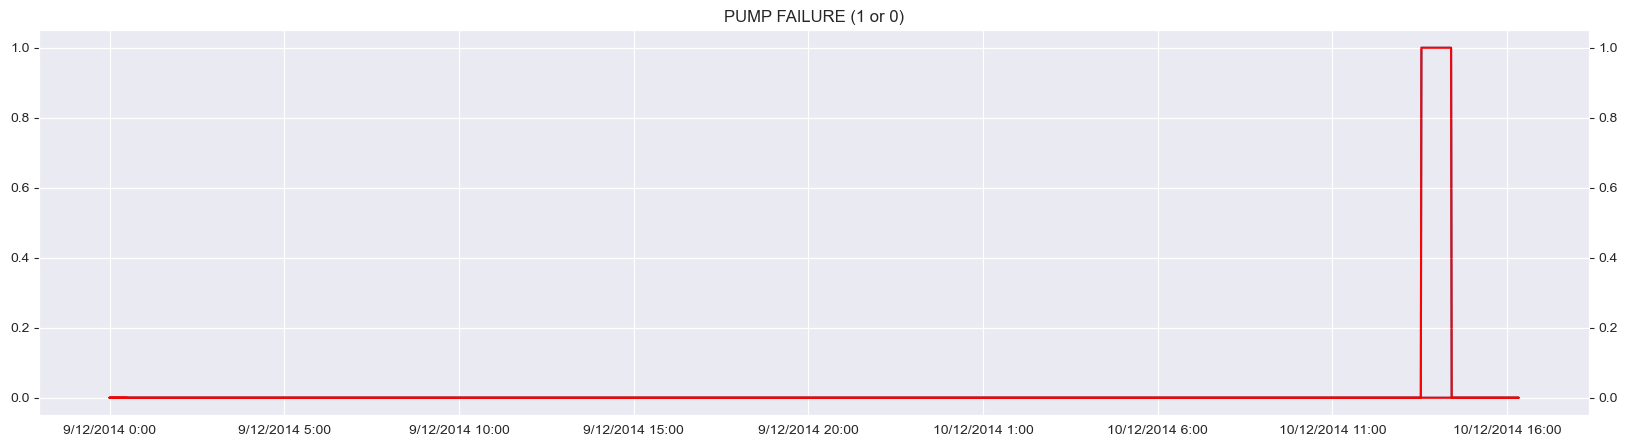

In [71]:
#iterate over all stdev variables against pump failure
for item in ListOfVariables:
    fig, ax = plt.subplots()
    ax.plot(dataframe_stdev[item])
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax2 = ax.twinx()
    ax2.plot(dataframe_stdev['PUMP FAILURE (1 or 0)'], color='red')
    ax2.xaxis.set_major_locator(plt.MaxNLocator(10))
    plt.title(item)
    plt.show()

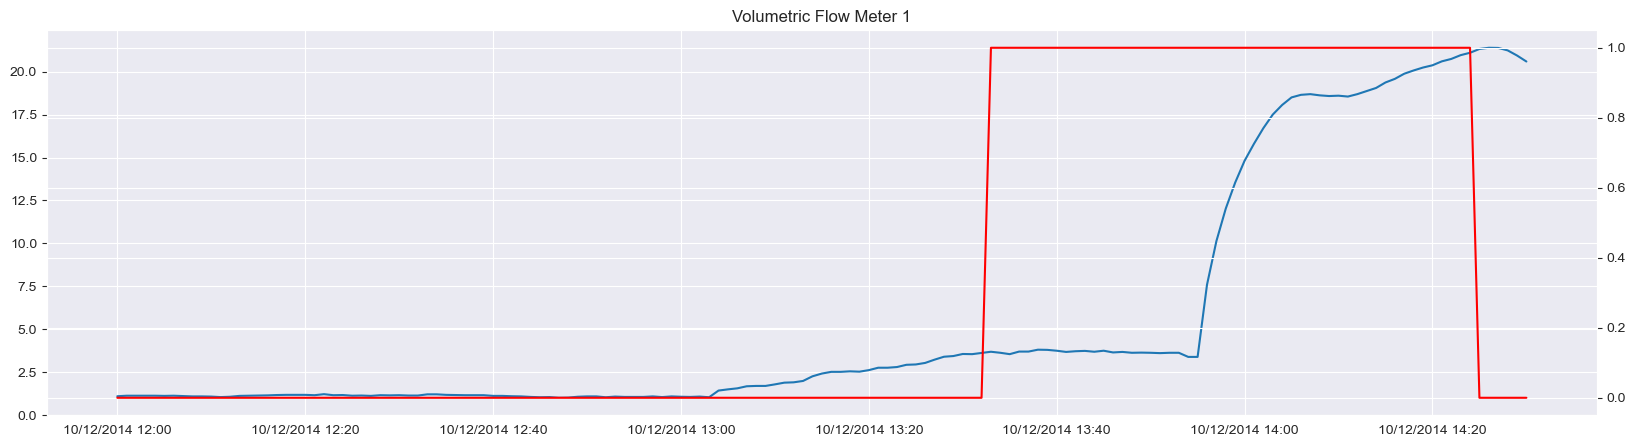

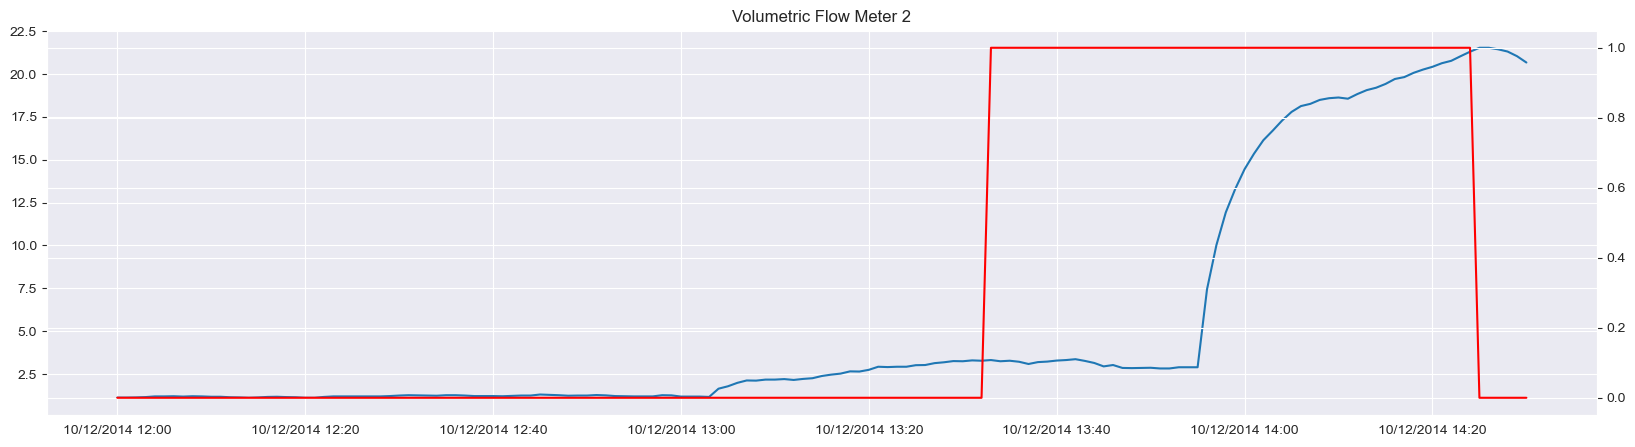

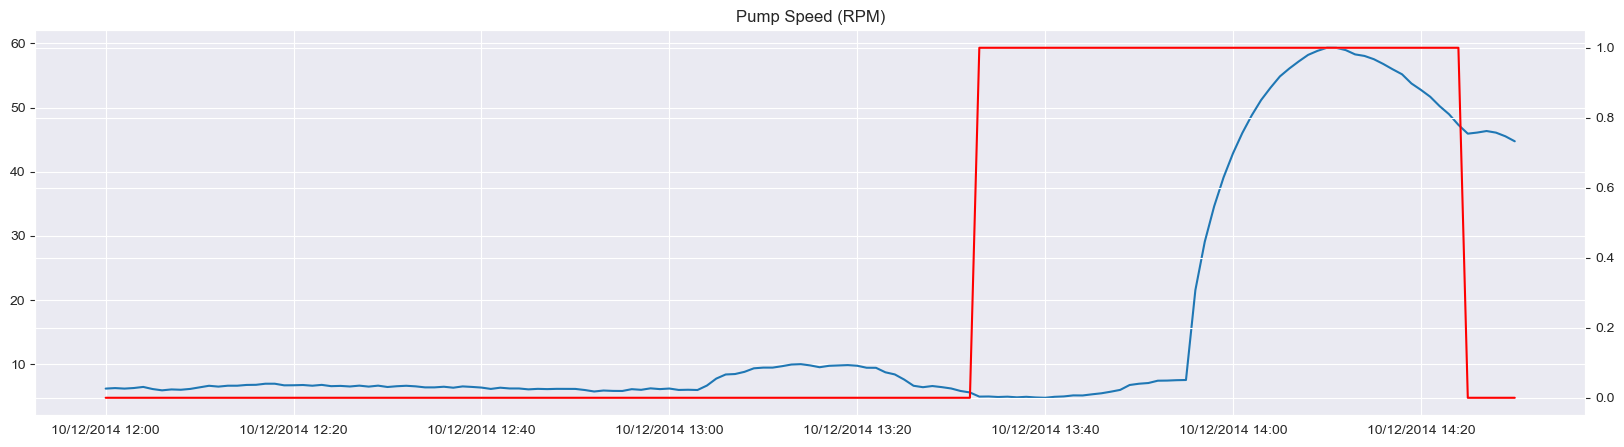

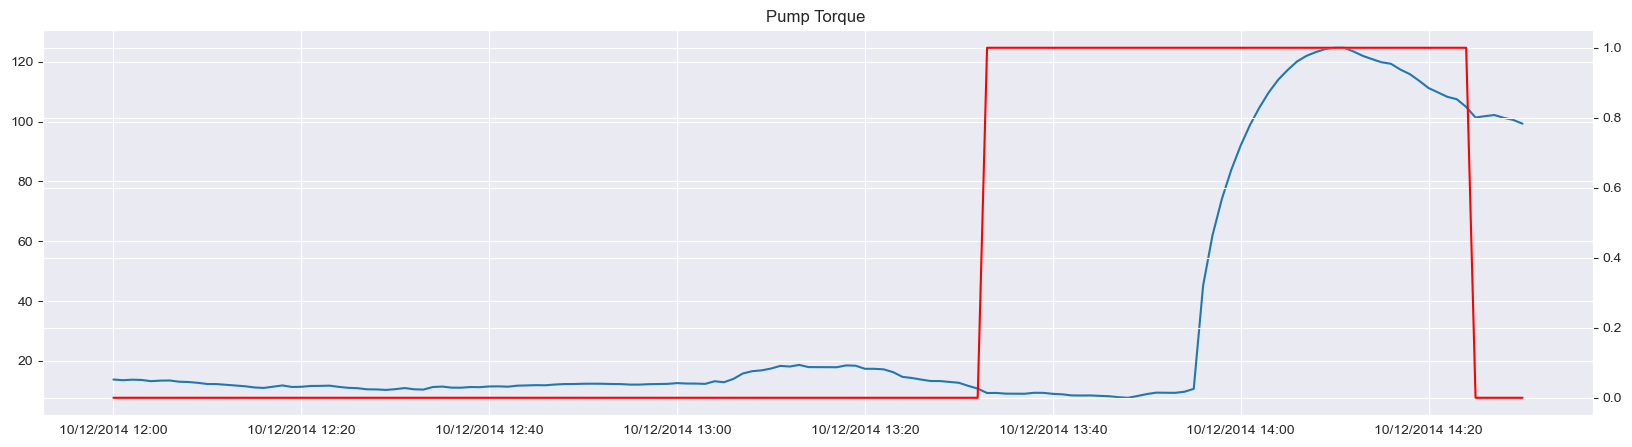

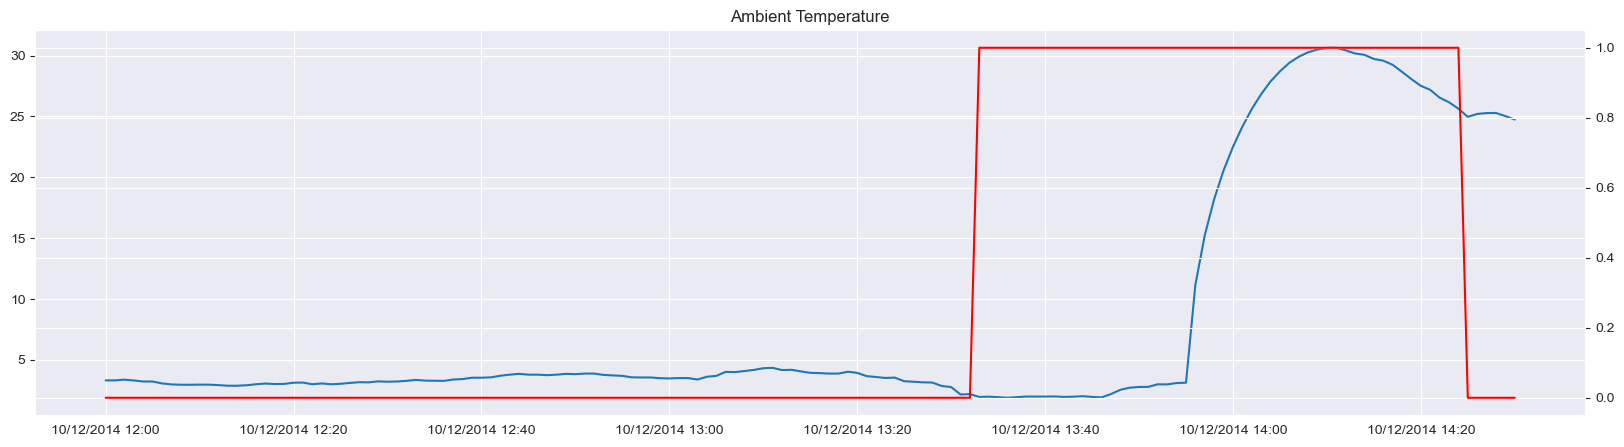

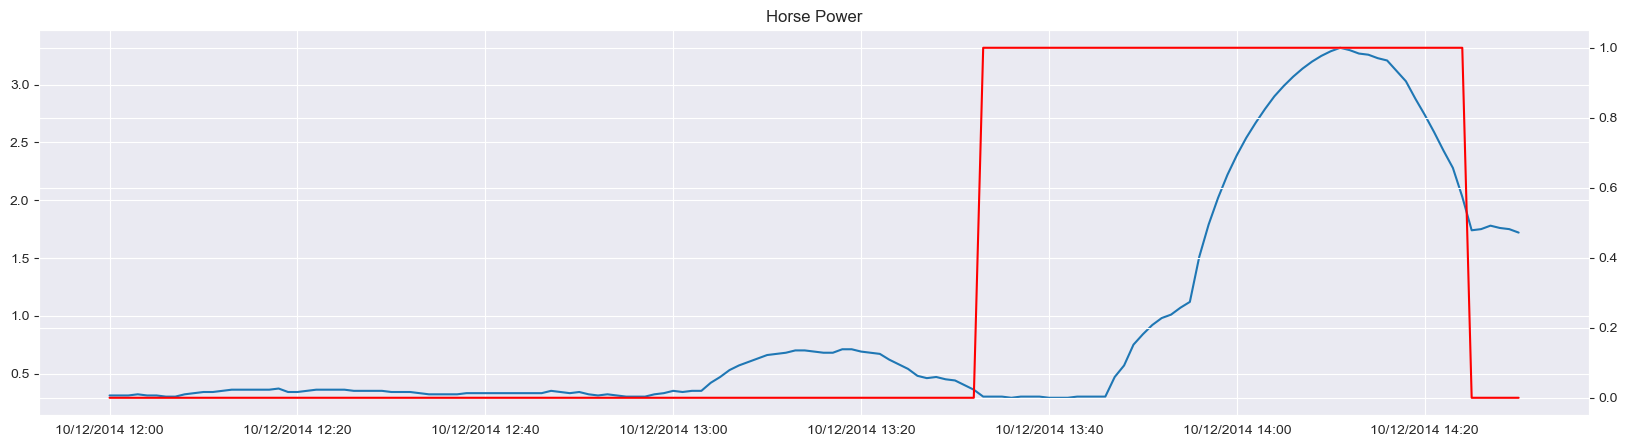

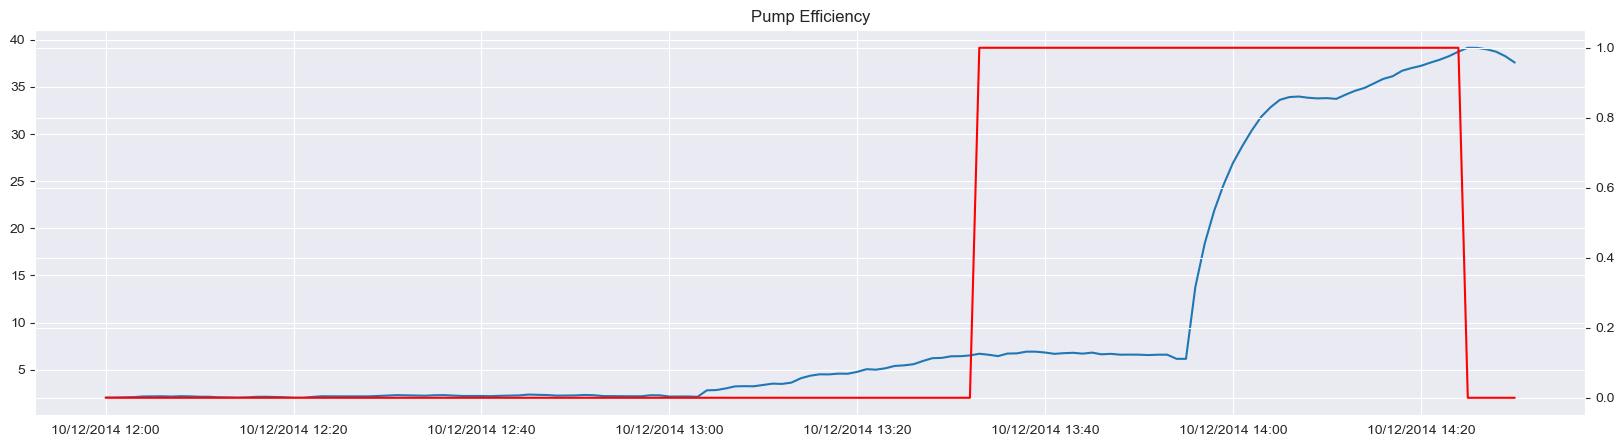

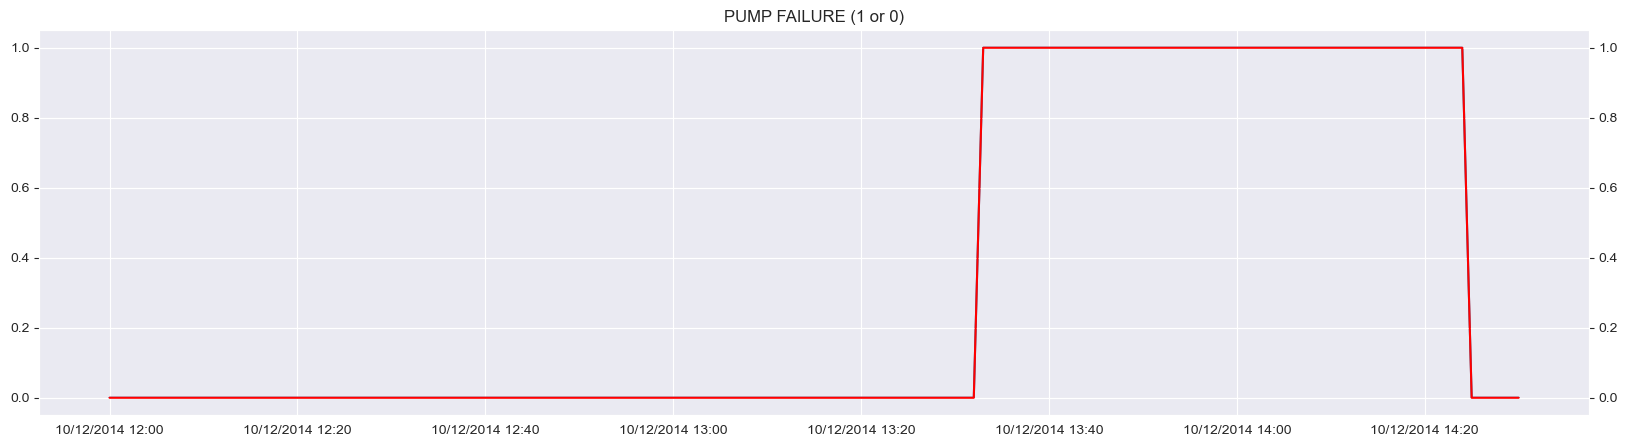

In [72]:
#filtered for the specific time period between 12:00 and 14:30
dataframe_time_filtered = dataframe_stdev[(dataframe_stdev.index >= "10/12/2014 12:00") & (dataframe_stdev.index <= "10/12/2014 14:30")]
for item in ListOfVariables:
    fig, ax = plt.subplots()
    ax.plot(dataframe_time_filtered[item])
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax2 = ax.twinx()
    ax2.plot(dataframe_time_filtered['PUMP FAILURE (1 or 0)'], color='red')
    ax2.xaxis.set_major_locator(plt.MaxNLocator(10))
    plt.title(item)
    plt.show()

---

# Part II: <span style="color:green">Inferential Statistical Analysis</span>

### Create a Correlation Heatmap 
Using Seaborn's heatmap function, we'll create a heatmap that clearly shows the correlation coefficient for all variables using the raw dataset.

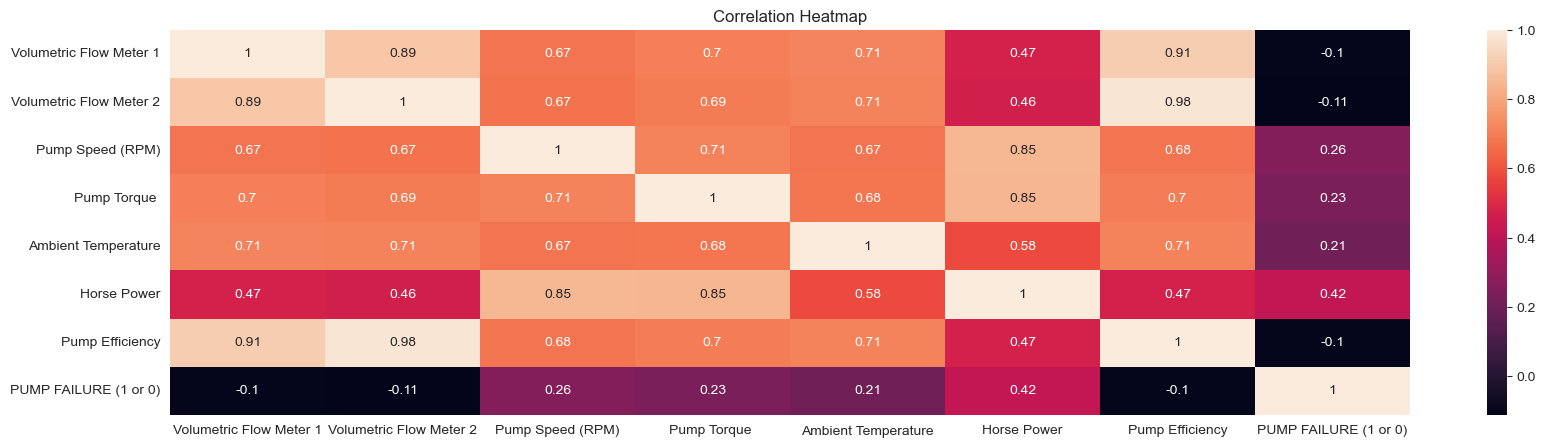

In [76]:
dataframe_num = dataframe_raw.select_dtypes(include='number')
dataframe_corr = dataframe_num.corr()
sns.heatmap(dataframe_corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

Looking at correlation with Pump Failure only

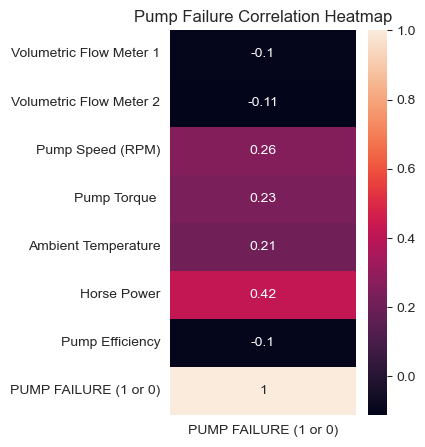

Plotting the correlation of the variables from Raw data shows a low-moderate correlation between Horse Power and Pump Failure, 
and a low correlation with Pump Speed, Pump Torque, and Ambient Temperature.


In [78]:
dataframe_num = dataframe_raw.select_dtypes(include='number')
dataframe_corr = dataframe_num.corr()
pump_failure_corr = dataframe_corr[['PUMP FAILURE (1 or 0)']]
plt.figure(figsize=(3, 5))
sns.heatmap(pump_failure_corr, annot=True)
plt.title('Pump Failure Correlation Heatmap')
plt.show()
print('Plotting the correlation of the variables from Raw data shows a low-moderate correlation between Horse Power and Pump Failure, \nand a low correlation with Pump Speed, Pump Torque, and Ambient Temperature.')

### Create a Barplot of Correlated Variables
Using the Raw dataset


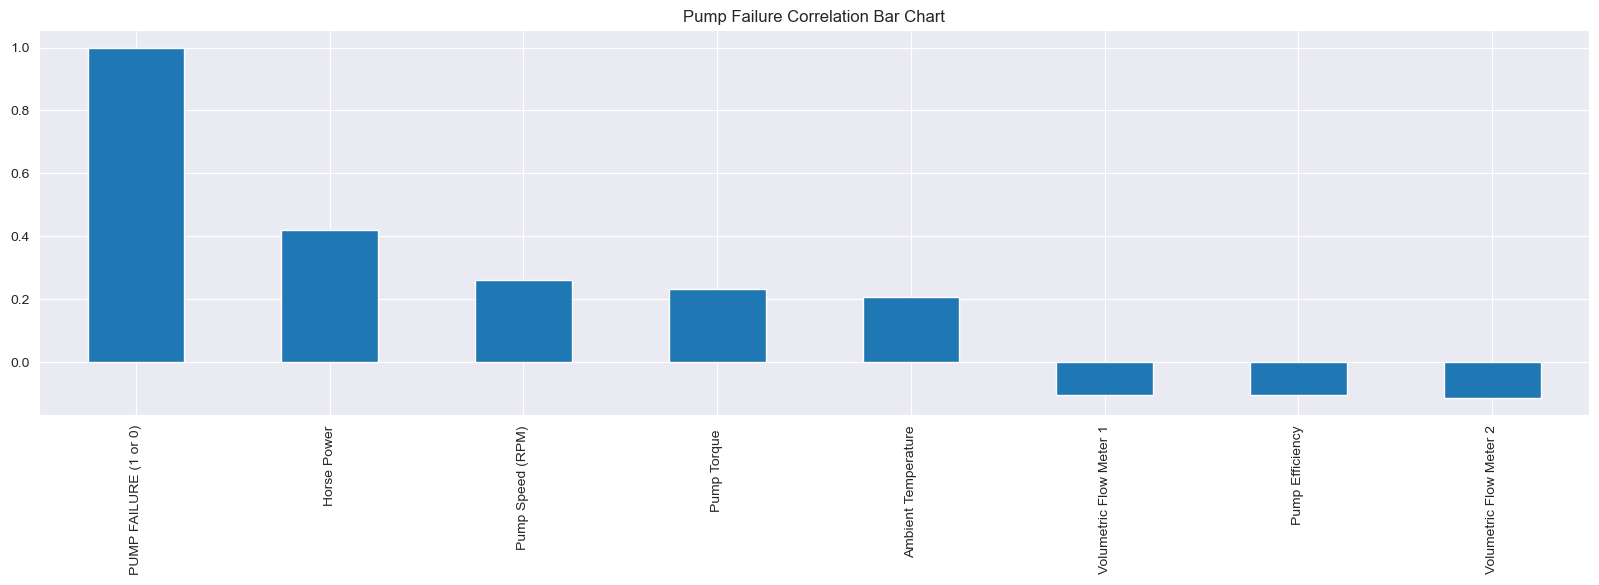

In [80]:
dataframe_pump_failure = dataframe_corr['PUMP FAILURE (1 or 0)'].sort_values(ascending=False)
dataframe_pump_failure.plot(kind='bar')
plt.title('Pump Failure Correlation Bar Chart')
plt.show()

### Create a Rolling Standard Deviation Correlation Heatmap
Using Seaborn's heatmap function, we'll create a heatmap that clearly shows the correlation coefficient for all variables using the StDev dataset.


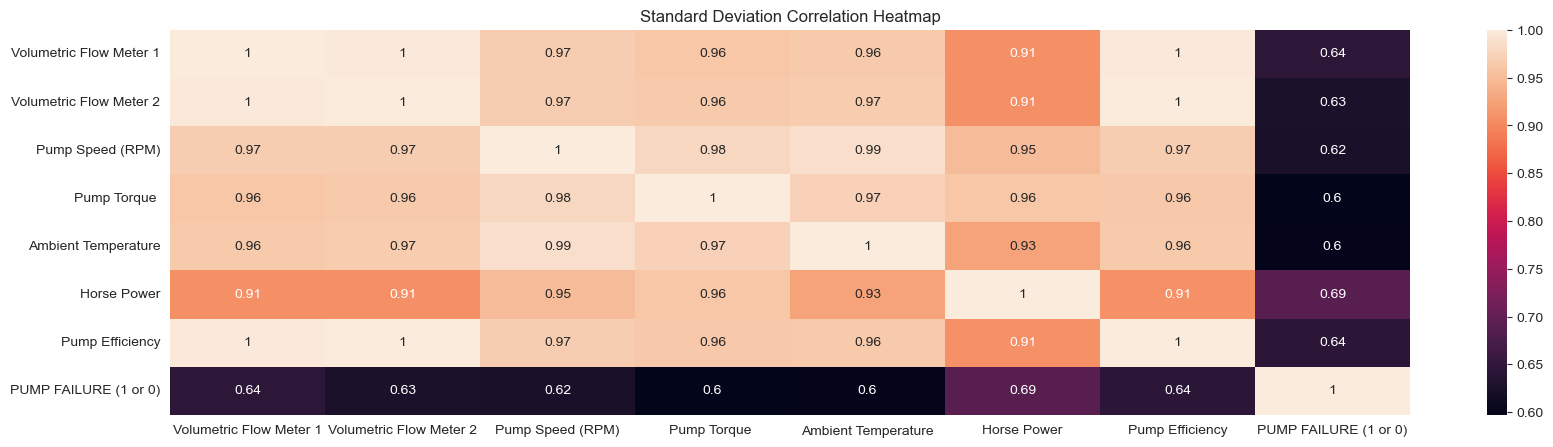

In [82]:
std_dataframe_num = dataframe_stdev.select_dtypes(include='number')
std_dataframe_corr = std_dataframe_num.corr()
sns.heatmap(std_dataframe_corr, annot=True)
plt.title('Standard Deviation Correlation Heatmap')
plt.show()

Looking at correlation with Pump Failure only

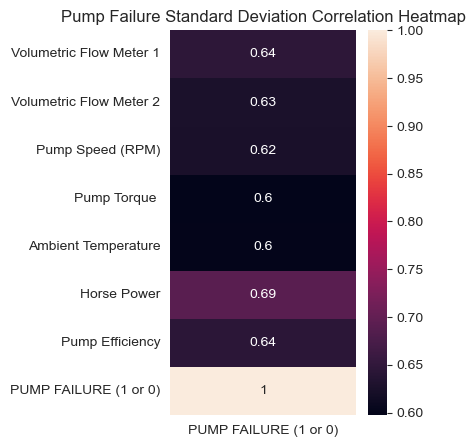

Plotting the correlation of the variables from StDev data shows a moderate correlation between essentially all variables and Pump Failure. 
This is most pronounced with HorsePower (r=0.69), Pump Efficiency (r=0.64), and Volumetric Flow Meter 1 (r=0.64).


In [84]:
std_dataframe_num = dataframe_stdev.select_dtypes(include='number')
std_dataframe_corr = std_dataframe_num.corr()
std_pump_failure_corr = std_dataframe_corr[['PUMP FAILURE (1 or 0)']]
plt.figure(figsize=(3, 5))
sns.heatmap(std_pump_failure_corr, annot=True)
plt.title('Pump Failure Standard Deviation Correlation Heatmap')
plt.show()
print('Plotting the correlation of the variables from StDev data shows a moderate correlation between essentially all variables and Pump Failure. \nThis is most pronounced with HorsePower (r=0.69), Pump Efficiency (r=0.64), and Volumetric Flow Meter 1 (r=0.64).')

### Creating a Multivariate Regression Model


Using the OLS Regression Model in the statsmodel.api library, creating regression equations that models the Pump Failure against all of the independent variables in the Raw and then StDev dataset.

In [87]:
#Dataframe_Raw
raw_dependent_variable = dataframe_raw['PUMP FAILURE (1 or 0)']
raw_independent_variables = dataframe_raw.drop(columns=['PUMP FAILURE (1 or 0)'])
raw_independent_variables = raw_independent_variables.select_dtypes(include='number')
raw_independent_variables = sm.add_constant(raw_independent_variables)
raw_regression_model = sm.OLS(raw_dependent_variable, raw_independent_variables).fit()
print(raw_regression_model.summary())

                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.362
Model:                               OLS   Adj. R-squared:                  0.360
Method:                    Least Squares   F-statistic:                     197.9
Date:                   Mon, 11 Nov 2024   Prob (F-statistic):          5.58e-233
Time:                           11:56:52   Log-Likelihood:                 1823.0
No. Observations:                   2453   AIC:                            -3630.
Df Residuals:                       2445   BIC:                            -3583.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [88]:
#Dataframe_Stdev
stdev_dependent_variable = dataframe_stdev['PUMP FAILURE (1 or 0)']
stdev_independent_variables = dataframe_stdev.drop(columns=['PUMP FAILURE (1 or 0)'])
stdev_independent_variables = stdev_independent_variables.select_dtypes(include='number')
stdev_independent_variables = sm.add_constant(stdev_independent_variables)
stdev_regression_model = sm.OLS(stdev_dependent_variable, stdev_independent_variables).fit()
print(stdev_regression_model.summary())

                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.778
Model:                               OLS   Adj. R-squared:                  0.778
Method:                    Least Squares   F-statistic:                     1225.
Date:                   Mon, 11 Nov 2024   Prob (F-statistic):               0.00
Time:                           11:56:52   Log-Likelihood:                 3117.4
No. Observations:                   2452   AIC:                            -6219.
Df Residuals:                       2444   BIC:                            -6172.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

With an R-squared value of 0.36, the Raw data only explains roughly a third of the variablility in the model. However the StDev data has an R-squared value of 0.78 which means almost 80% of the variance in the data is explained by the model. Thus with more than double the R-Squared value, the StDev data model is the superior choice.

### Analysis of Coefficients
Using this StDev based model, we want to extract the coefficients to create a bar plot that identifies which coefficients react most strongly with respect to Pump Failure.

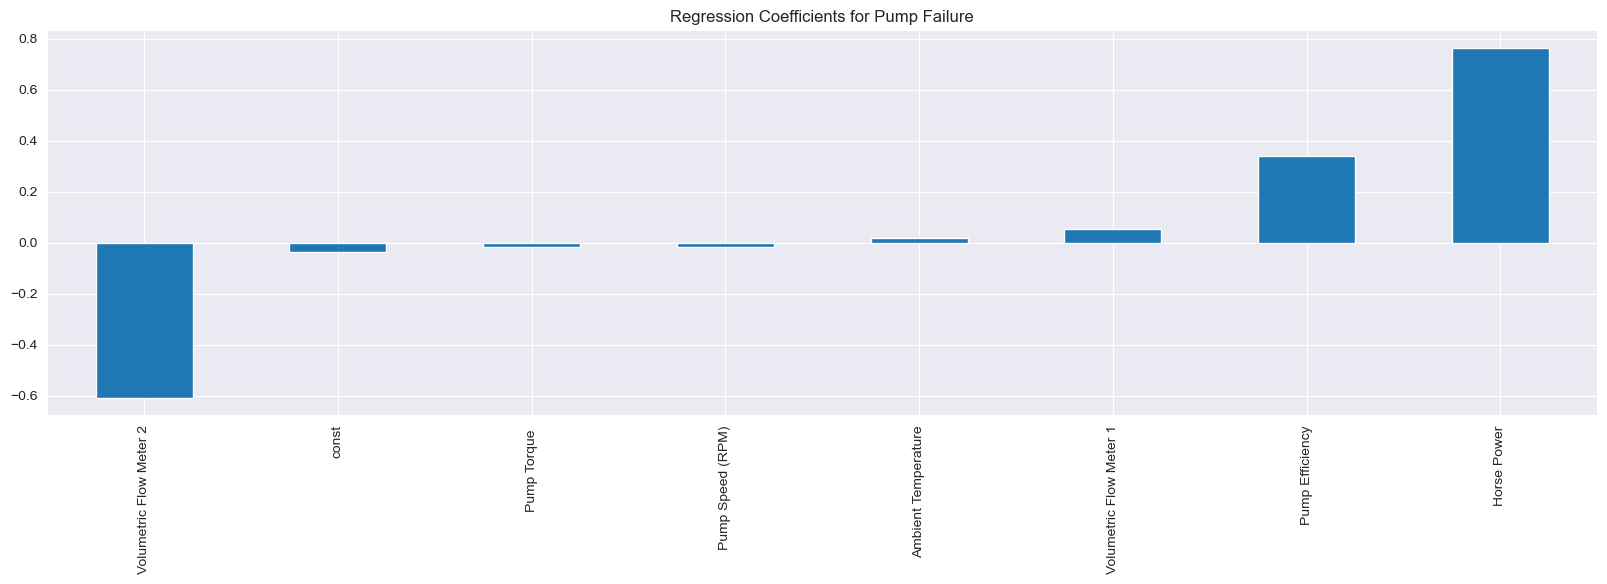

In [91]:
stdev_coeffs = stdev_regression_model.params
stdev_coeffs = stdev_coeffs.sort_values(ascending=True)
stdev_coeffs.plot(kind='bar')
plt.title('Regression Coefficients for Pump Failure')
plt.show()

It appears that Volumetric Flow Meter 2 is negatively correlated with Pump Failure, while Pump Efficiency and Horse Power are both positively correlated with Pump Failure

### Validate Predictions
We will make a new column in the StDev dataset called 'Prediction' from the previous model, then plot it against the three most correlated variables as well as pump failure.

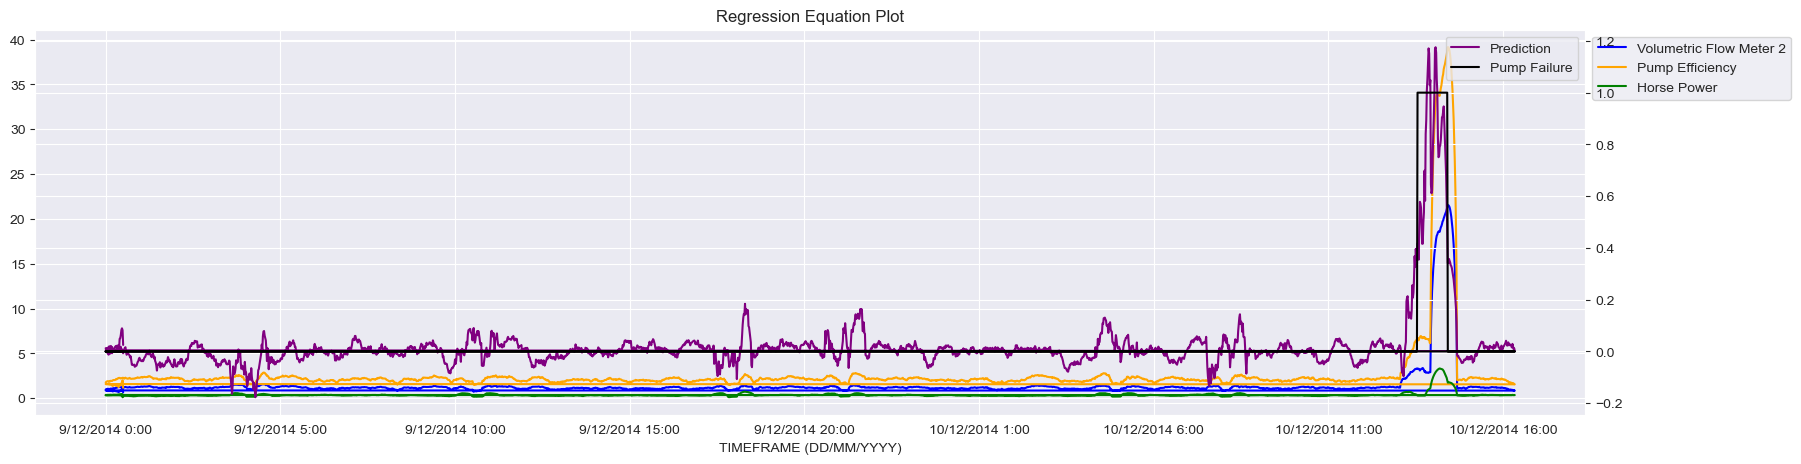

In [96]:
date = dataframe_stdev.index
dataframe_stdev['Prediction'] = stdev_regression_model.predict(stdev_independent_variables)
fig, ax = plt.subplots()
ax.plot(date, dataframe_stdev['Volumetric Flow Meter 2'], color='blue', label='Volumetric Flow Meter 2')
ax.plot(date, dataframe_stdev['Pump Efficiency'], color='orange', label='Pump Efficiency')
ax.plot(date, dataframe_stdev['Horse Power'], color='green', label='Horse Power')
ax2 = ax.twinx()
ax2.plot(date, dataframe_stdev['Prediction'], color='purple', label='Prediction')
ax2.plot(date, dataframe_stdev['PUMP FAILURE (1 or 0)'], color='black', label='Pump Failure')
plt.title('Regression Equation Plot')
ax.set_xlabel('TIMEFRAME (DD/MM/YYYY)')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.legend(loc='upper right')
plt.show()


Our results show that the Prediction plot fairly closely follows the Pump Failure plot. This stdev based regression model can be used to predict (with ~80% accuracy) when a pump failure is likely to occur. 